In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.2.3', '2.2.3', '0.13.2', '3.10.0')

# Load the data

In [3]:
df =pd.read_csv('data/Cars.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of your data
df.shape

(8128, 13)

In [6]:
#Check the statistical data 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check data type of our input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# check column names 
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# Exploratory Data Analysis and Preprocessing

In [9]:
# Drop the 'torque' column
df = df.drop(columns=['torque'])

In [10]:
# Check the distribution of 'fuel' type
print(df['fuel'].value_counts())

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64


## 2.1 Univariate Analysis
### Single Variable Exploratory Data Analysis

## Count Plot

<Axes: xlabel='fuel', ylabel='count'>

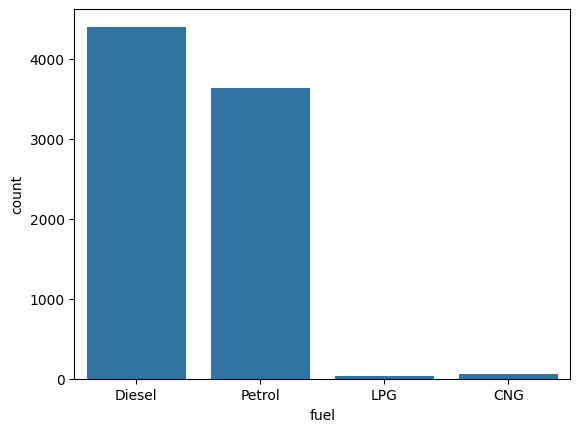

In [11]:
# Let's see how many types of fuel there are 
sns.countplot(data=df, x='fuel')

## Distribution plot

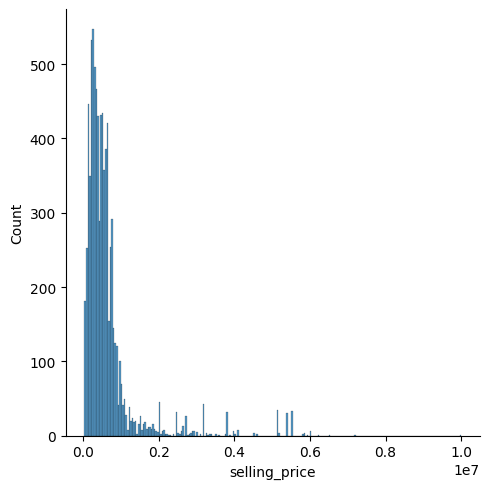

In [12]:
# distribution plot for 'selling price'A2__Predicting_Car_Price.pdf

sns.displot(data = df, x = 'selling_price')

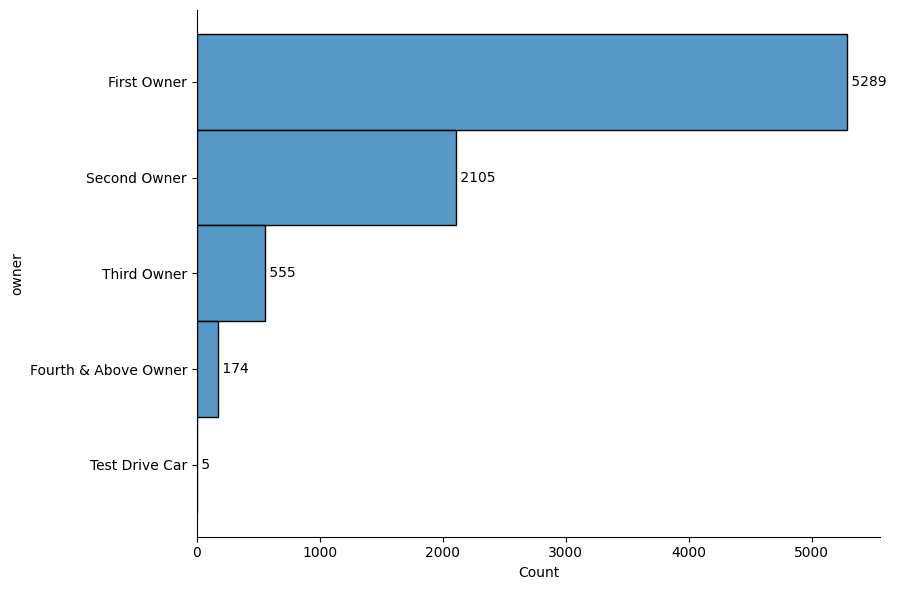

In [13]:
# distribution of types of owner
# making a distribution plot with horizontal bars
sns_plot = sns.displot(data =df, y= 'owner',height =6, aspect= 1.5)

# add count annotations to each bar
for container in sns_plot.ax.containers:
    sns_plot.ax.bar_label(container, fmt = ' %d ', label_type='edge') # format as an integer

In [14]:
# removing all rows with CNG and LPG 
df = df.drop(df[df['fuel'].isin(['LPG','CNG'])].index)
df['fuel'].value_counts()

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

In [15]:
# Remove 'kmpl' and convert to float in mileage column
df['mileage'] = df['mileage'].str.split(' ').str[0]  # extract numeric part
df ['mileage'] = df['mileage'].astype (float)   # convert to float

In [16]:
# Remove 'CC' and convert to float in enging column
df['engine']=df['engine'].str.split(' ').str[0] #extract numeric part
df['engine'] = df['engine'].astype(float)     # convert to float


In [17]:
# Remove 'bhp' and convert to float in max_power column
df['max_power']=df['max_power'].str.split(' ').str[0] #extract numeric part
df['max_power'] = df['max_power'].astype(float)     # convert to float

In [18]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [19]:
# extract only the first word in the 'name' column
df['name'] = df ['name'].str.split(' ').str[0]

In [20]:
# rename 'name' column to 'brand'
df.rename(columns={'name':'brand'},inplace = True)

## Mapping (for the feature owner, map first owner to 1, ..... Test Drive Car to 5)

In [21]:
owner_mapping = {
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5
}
df['owner'] = df['owner'].map(owner_mapping)

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


#### 2.2 Multivariate Analysis

#### Multiple variable explortary data analysis

#### Bar Plot (Mean Selling Price per Owner)

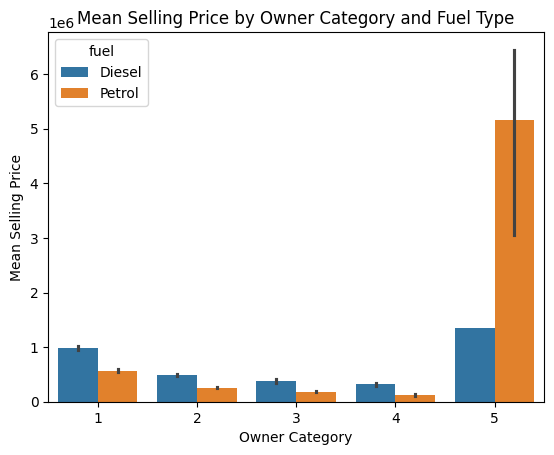

In [22]:
sns.barplot(x='owner', y='selling_price', hue='fuel', data=df, estimator='mean')
plt.xlabel("Owner Category")
plt.ylabel("Mean Selling Price")
plt.title("Mean Selling Price by Owner Category and Fuel Type")
plt.show()

### Key Insights
1.	Most Expensive Category:
*	Test drive cars (Owner Category 5) have the highest mean selling prices, especially for petrol cars.
2.	Depreciation with Ownership:
*	Selling price decreases with the number of previous owners, regardless of fuel type.
3.	Diesel Cars Are Generally More Expensive:
*	Except for test drive cars, Diesel vehicles consistently have higher mean selling prices across ownership categories.

In [23]:
# Based on our barplot analysis, Test Drive Cars are ridiculously expensive. 
# therefore we will delete all samples related to it 

# Filter out rows where the owner column is 5 (Test Drive Car)
df = df.drop(df[df['owner'] == 5].index)       # drop is a method therefore start with ( )
df.head()


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [24]:
df['owner'].value_counts()

owner
1    5238
2    2073
3     547
4     170
Name: count, dtype: int64

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the selling price of cars.  It's also for checking whether certain features are too correlated.

#### Tips: Label encoding

Now we would like to change "Developing" and "Developed" to "0" and "1", since machine learning algorithms do not understand text.   Also, correlation matrix and other similar computational tools require label encoding.

In [25]:
from sklearn.preprocessing import LabelEncoder       # pip install scikit-learn

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()

array([0, 1])

In [26]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

df["transmission"].unique()

array([1, 0])

In [28]:
#Retrieve the mapping of classes to numbers
mapping = {label: index for index, label in enumerate(le.classes_)}
print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {'Automatic': 0, 'Manual': 1}


In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

df["seller_type"].unique()

array([1, 0, 2])

In [30]:
#Retrieve the mapping of classes to numbers
mapping = {label: index for index, label in enumerate(le.classes_)}
print("Label Encoding Mapping:", mapping)

Label Encoding Mapping: {'Dealer': 0, 'Individual': 1, 'Trustmark Dealer': 2}


In [31]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Create a new column for the encoded values
df['brand_encoded'] = le.fit_transform(df['brand'])

# Check the unique encoded values
print(df['brand_encoded'].unique())

# If you want to check the mapping between original and encoded values
print(le.classes_)  # Displays the original class order


[20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25]
['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [32]:
# Saving the names and what they map to in a dictionary to put into model file
brand_encoded_map = {}
keys = le.classes_
values = df.brand_encoded.unique()
for key in keys:
    for value in values:
        brand_encoded_map[key] = value
        values = np.delete(values, np.where(values == value))
        break

brand_encoded_map

{'Ambassador': np.int64(20),
 'Ashok': np.int64(27),
 'Audi': np.int64(10),
 'BMW': np.int64(11),
 'Chevrolet': np.int64(29),
 'Daewoo': np.int64(9),
 'Datsun': np.int64(26),
 'Fiat': np.int64(19),
 'Force': np.int64(28),
 'Ford': np.int64(4),
 'Honda': np.int64(7),
 'Hyundai': np.int64(6),
 'Isuzu': np.int64(14),
 'Jaguar': np.int64(21),
 'Jeep': np.int64(22),
 'Kia': np.int64(2),
 'Land': np.int64(30),
 'Lexus': np.int64(3),
 'MG': np.int64(23),
 'Mahindra': np.int64(17),
 'Maruti': np.int64(13),
 'Mercedes-Benz': np.int64(16),
 'Mitsubishi': np.int64(18),
 'Nissan': np.int64(31),
 'Opel': np.int64(5),
 'Peugeot': np.int64(15),
 'Renault': np.int64(8),
 'Skoda': np.int64(0),
 'Tata': np.int64(1),
 'Toyota': np.int64(12),
 'Volkswagen': np.int64(24),
 'Volvo': np.int64(25)}

In [33]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,brand_encoded
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0,20
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0,27
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0,10
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0,11
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0,20


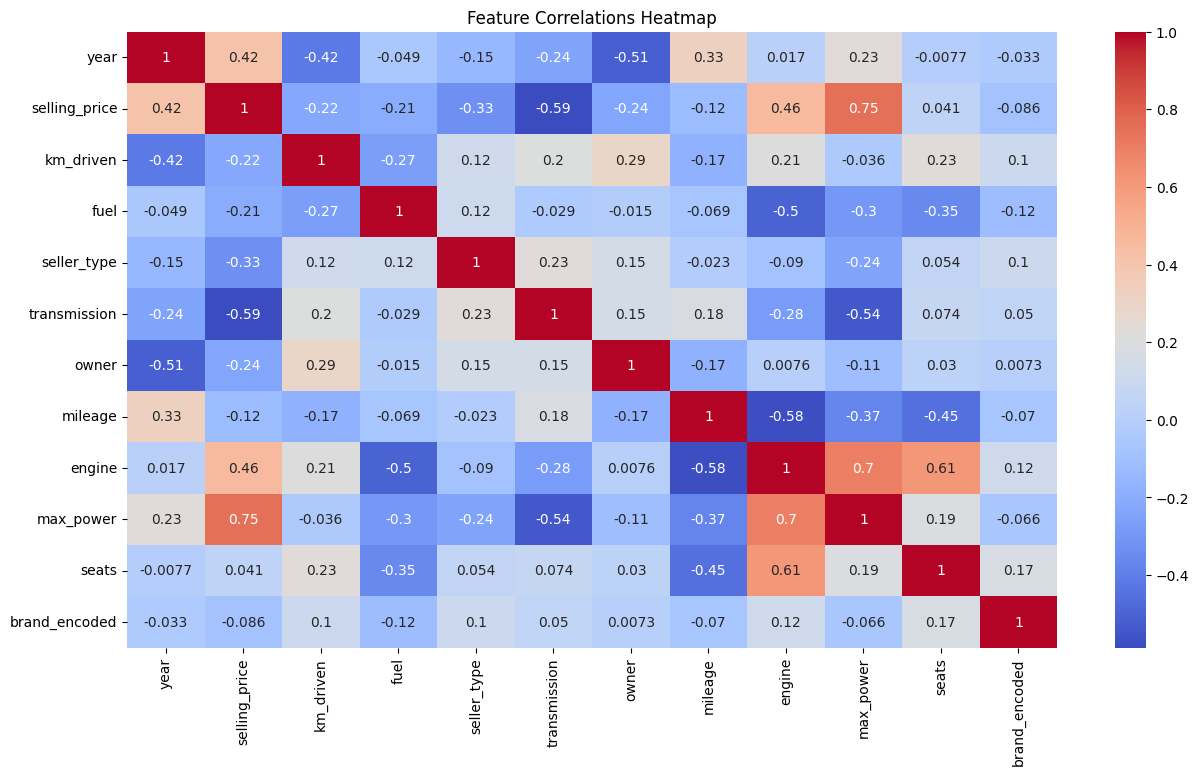

In [34]:
# Create a copy of the DataFrame and drop non-numeric columns
cars_price_temp = df.copy()  # Ensure you're copying the correct DataFrame name
cars_price_temp.drop(['brand'], axis='columns', inplace=True)  # Drop non-numeric columns like 'brand'

# Plot the heatmap for correlations
plt.figure(figsize=(15, 8))  # Set figure size
sns.heatmap(cars_price_temp.corr(), annot=True, cmap="coolwarm")  # Plot the correlation heatmap
plt.title("Feature Correlations Heatmap")  # Add a title
plt.show()  # Display the plot

## 4. Feature Selection

In [35]:
#x is our strong features
X = df[['brand_encoded','engine', 'max_power','transmission','year']]

#y is simply the selling_price col
y = df["selling_price"]

In [36]:
# Apply log transformation to the 'selling_price' column and assign it to y
df['selling_price'] = np.log(df['selling_price'])  # Update the DataFrame column
y = df['selling_price']  # Assign the updated column to y for your model

# Verify the values
print(df.head())  # Check the DataFrame
print(y.head())   # Check the y variable


     brand  year  selling_price  km_driven  fuel  seller_type  transmission  \
0   Maruti  2014      13.017003     145500     0            1             1   
1    Skoda  2014      12.821258     120000     0            1             1   
2    Honda  2006      11.970350     140000     1            1             1   
3  Hyundai  2010      12.323856     127000     0            1             1   
4   Maruti  2007      11.775290     120000     1            1             1   

   owner  mileage  engine  max_power  seats  brand_encoded  
0      1    23.40  1248.0      74.00    5.0             20  
1      2    21.14  1498.0     103.52    5.0             27  
2      3    17.70  1497.0      78.00    5.0             10  
3      1    23.00  1396.0      90.00    5.0             11  
4      1    16.10  1298.0      88.20    5.0             20  
0    13.017003
1    12.821258
2    11.970350
3    12.323856
4    11.775290
Name: selling_price, dtype: float64


#### Train/ Test split

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# 5. Preprocessing

In [38]:
#check for null values
X_train[['brand_encoded','engine', 'max_power','transmission','year']].isna().sum()

brand_encoded      0
engine           154
max_power        149
transmission       0
year               0
dtype: int64

In [39]:
#check for null values
X_test[['brand_encoded','engine', 'max_power','transmission','year']].isna().sum()

brand_encoded     0
engine           60
max_power        59
transmission      0
year              0
dtype: int64

In [40]:
y_train.isna().sum()

np.int64(0)

In [41]:
y_test.isna().sum()

np.int64(0)

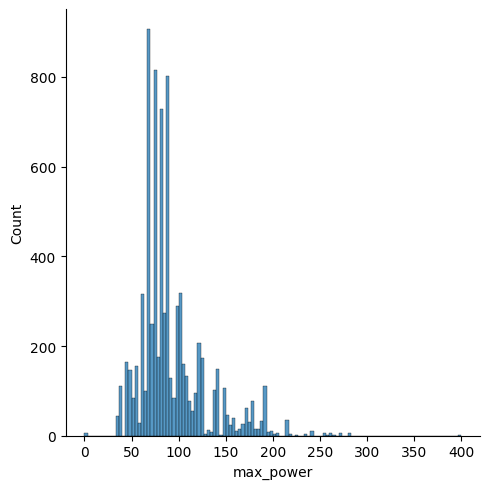

In [42]:
sns.displot(data=df, x='max_power')

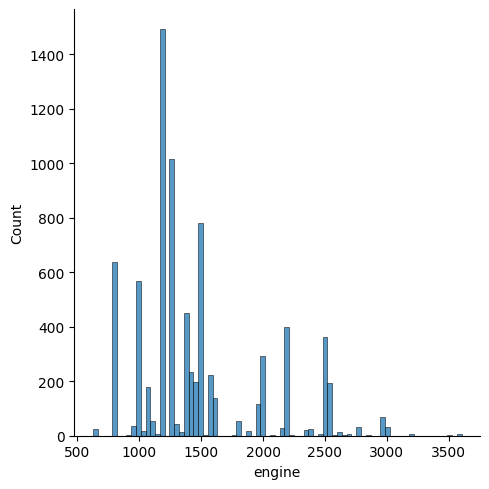

In [43]:
sns.displot(data=df, x='engine')

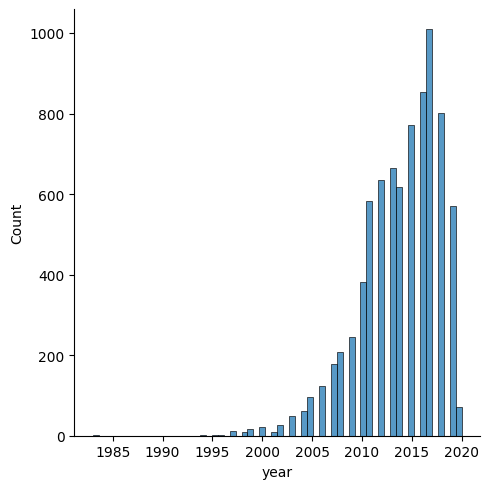

In [44]:
sns.displot(data=df, x='year')

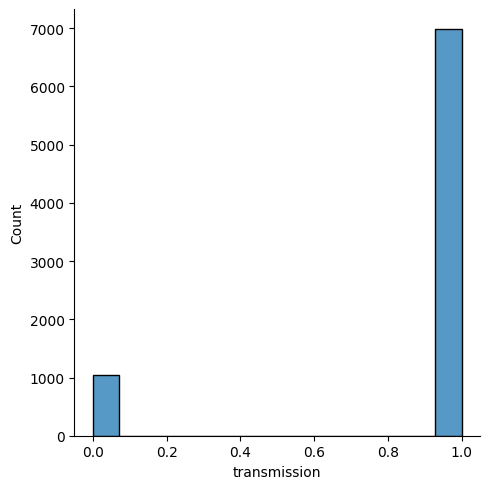

In [45]:
sns.displot(data=df, x='transmission')

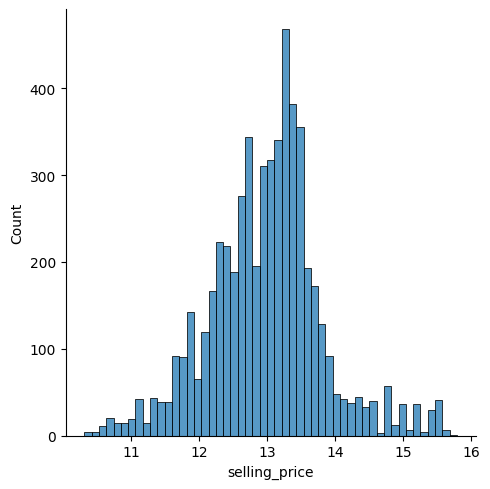

In [46]:
sns.displot(y_train)

In [47]:
#let's fill the training set first!

X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [48]:
#let's fill the testing set with the training distribution first!

X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [49]:
#check again
X_train[['brand_encoded','engine', 'max_power','transmission','year']].isna().sum()

brand_encoded    0
engine           0
max_power        0
transmission     0
year             0
dtype: int64

In [50]:
X_test[['brand_encoded','engine', 'max_power','transmission','year']].isna().sum()

brand_encoded    0
engine           0
max_power        0
transmission     0
year             0
dtype: int64

In [51]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

# Checking outliers

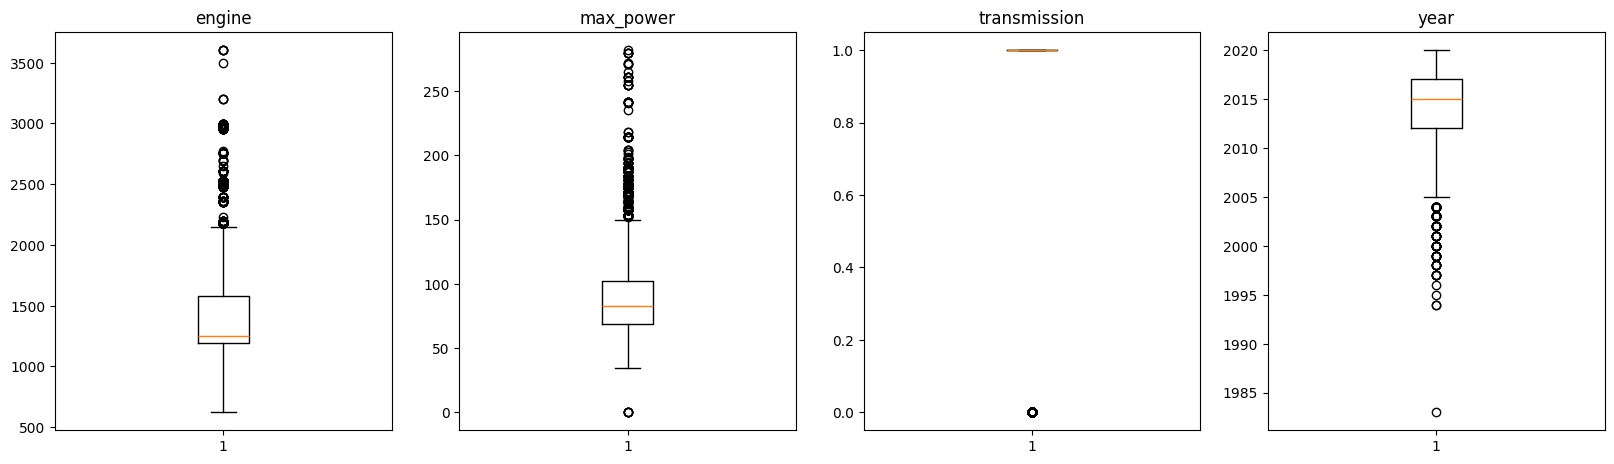

In [52]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2,'transmission':3,'year':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [53]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [54]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 836
Percent of data that is outlier: 14.88%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%

---------------transmission---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%

---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%


# Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
import pickle
# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
with open  ('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [56]:
# Adding intercepts to include a bias in our theta
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [57]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 6)
Shape of X_test:  (2409, 6)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# Modeling

In [58]:
import mlflow
import os
import mlflow.sklearn

# Set MLflow Tracking Server
mlflow.set_tracking_uri("http://localhost:5000")

# Set User/Author Info
os.environ["LOGNAME"] = "ant2"   # Fixed the assignment

# Set Experiment Name
mlflow.set_experiment("ant-A2car-price-prediction")

print("MLflow experiment set successfully!")

MLflow experiment set successfully!


In [59]:
import math

In [73]:

from math import sqrt

from sklearn.model_selection import KFold

class LinearRegression(object):
    
    # KFold cross-validation with 3 splits
    kfold = KFold(n_splits=3)

    def __init__(self, regularization, lr, method, momentum, xavier_method, mlflow_params, 
                 num_epochs=100, batch_size=50, cv=kfold):
        self.regularization = regularization
        self.lr = lr
        self.method = method
        self.momentum = momentum
        self.xavier_method = xavier_method
        self.mlflow_params = mlflow_params
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.cv = cv

    def mse(self, ytrue, ypred):
        #"""Mean Squared Error Calculation"""
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def r2(self, ytrue, ypred):
        #"""R-Squared Calculation"""
        y_mean = np.mean(ytrue)
        ss_total = np.sum((ytrue - y_mean) ** 2)
        ss_residual = np.sum((ytrue - ypred) ** 2)
        return 1 - (ss_residual / ss_total)

    def avgMse(self):
        #"""Average MSE of Every Fold"""
        return np.sum(np.array(self.kfold_mse)) / len(self.kfold_mse)

    def avgR2(self):
        #"""Average R2 of Every Fold"""
        return np.sum(np.array(self.kfold_r2)) / len(self.kfold_r2)

    def fit(self, X_train, y_train):
        #"""Fit the Model with Cross-Validation"""
        self.kfold_mse = []
        self.kfold_r2 = []
        self.val_loss_old = np.inf  # Start with infinity for early stopping

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]

            # Xavier Initialization
            if self.xavier_method == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])
            else:
                threshold = sqrt(X_cross_train.shape[1])
                lower, upper = -(1 / threshold), (1 / threshold)
                self.theta = np.random.uniform(lower, upper, X_cross_train.shape[1])

            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                for epoch in range(self.num_epochs):
                    perm = np.random.permutation(X_cross_train.shape[0])
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]

                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_batch = X_cross_train[batch_idx].reshape(1, -1)
                            y_batch = y_cross_train[batch_idx].reshape(1, )
                            train_loss = self._train(X_batch, y_batch)
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_batch = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_batch = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_batch, y_batch)
                    else:
                        train_loss = self._train(X_cross_train, y_cross_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    # Validation Predictions
                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    val_r2 = self.r2(y_cross_val, yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)
                    mlflow.log_metric(key="val_r2", value=val_r2, step=epoch)

                    # Early Stopping Condition with Tolerance
                    #if np.abs(val_loss_new - self.val_loss_old) < 1e-6:
                        #break
                    #self.val_loss_old = val_loss_new
                    # Add patience and tolerance for early stopping
                    patience = 10  # Number of epochs to wait before stopping
                    tolerance = 1e-6  # Minimum improvement threshold
                    no_improvement_count = 0

                    # Early Stopping Condition
                    if val_loss_new >= self.val_loss_old - tolerance:
                        no_improvement_count += 1
                    else:
                        no_improvement_count = 0

                    if no_improvement_count >= patience:
                        print(f"Early stopping triggered after {patience} epochs.")
                        break

                    self.val_loss_old = val_loss_new

                self.kfold_mse.append(val_loss_new)
                self.kfold_r2.append(val_r2)
                print(f"Fold {fold} - MSE : {val_loss_new}")
                print(f"Fold {fold} - R2 : {val_r2}")

    def _train(self, X, y):
        #"""Perform One Training Step"""
        yhat = self.predict(X)
        m = X.shape[0]
        grad = (1/m) * X.T @ (yhat - y) + self.regularization.derivation(self.theta)
        self.theta -= self.lr * grad
        return self.mse(y, yhat)
    
    def predict(self, X):
        #"""Predict Target Values"""
        return X @ self.theta  
    
    def _coef(self):
        #"""Return Coefficients (Excluding Bias)"""
        return self.theta[1:]  

    def _bias(self):
        #"""Return Bias Term"""
        return self.theta[0]
    
    def feature_importance_plot(self, feature_names=None):
        #"""Plot Feature Importance Based on Coefficients"""
        if self.theta is None:
            raise ValueError("Model is not trained yet. Call fit() before plotting feature importance.")
        
        coefficients = self._coef()
        feature_importance = np.abs(coefficients)
        sorted_idx = np.argsort(feature_importance)

        if feature_names is None:
            feature_names = [f'Feature {i}' for i in range(len(coefficients))]

        plt.figure(figsize=(10, 6))
        plt.barh([feature_names[i] for i in sorted_idx], feature_importance[sorted_idx])
        plt.xlabel('Coefficient Value (Absolute)')
        plt.title('Feature Importance based on Coefficients')
        plt.show()


# Polynomial Feature Transformer Class
class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree

    def fit_transform(self, X):
        #"""Create Polynomial Features"""
        return np.column_stack([X ** self.degree])


In [75]:
# Regularization Classes
class LassoPenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class NoRegularization:
    def __init__(self, l =None): #Accept 'L' but ignore it
        pass

    def __call__(self, theta): 
        return 0
        
    def derivation(self, theta):
        return 0


# Linear Regression Variants
class Lasso(LinearRegression):
    def __init__(self, method, lr, xavier_method, momentum, l, mlflow_params, num_epochs=100, batch_size=50):
        regularization = LassoPenalty(l)
        super().__init__(regularization=regularization, lr=lr, method=method, 
                         momentum=momentum, xavier_method=xavier_method, 
                         mlflow_params=mlflow_params, num_epochs=num_epochs, batch_size=batch_size)
        
class Ridge(LinearRegression):
    def __init__(self, method, lr, xavier_method, momentum, l, mlflow_params, num_epochs=100, batch_size=50):
        regularization = RidgePenalty(l)
        super().__init__(regularization=regularization, lr=lr, method=method, 
                         momentum=momentum, xavier_method=xavier_method, 
                         mlflow_params=mlflow_params, num_epochs=num_epochs, batch_size=batch_size)

class Normal(LinearRegression):
    def __init__(self, method, lr, xavier_method, momentum, l=None, mlflow_params =None, num_epochs=100, batch_size=50):
        regularization = NoRegularization(l)
        super().__init__(regularization=regularization, lr=lr, method=method, 
                         momentum=momentum, xavier_method=xavier_method, 
                         mlflow_params=mlflow_params, num_epochs=num_epochs, batch_size=batch_size)


In [76]:
import sys
import mlflow
import mlflow.pyfunc


def str_to_class(classname):
    #"""Convert String to Class Reference"""
    return getattr(sys.modules[__name__], classname)

# Experiment Parameters
polynomial_degrees = [False, True]
regs = ["Normal", "Ridge", "Lasso"]
momentums = [0, 0.6]
grads = ['sto', 'mini', 'batch']
xavier_methods = ['zero', 'xavier']
lrs = [0.01, 0.001, 0.0001]

# Experimentation Loop
for polynomial_degree in polynomial_degrees:
    for reg in regs:
        for momentum in momentums:
            for grad in grads:
                for xavier_method in xavier_methods:
                    for lr in lrs:
                        # Define MLflow Parameters
                        mlflow_params = {
                            "polynomial": polynomial_degree,
                            "reg": reg, 
                            "momentum": momentum, 
                            "method": grad,
                            "xavier_method": xavier_method,
                            "lr": lr
                        }
                        params = {
                            "method": grad, 
                            "lr": lr, 
                            "l": lr, 
                            "momentum": momentum, 
                            "xavier_method": xavier_method, 
                            "mlflow_params": mlflow_params
                        }
                        
                        current_run = (
                            f"polynomial-{polynomial_degree}-reg-{reg}-"
                            f"momentum-{momentum}-method-{grad}-xavier-{xavier_method}-lr-{lr}"
                        )

                        # Start MLflow Logging
                        with mlflow.start_run(run_name=current_run, nested=True):
                            mlflow.log_params(params=mlflow_params)

                            print("="*5, current_run, "="*5)

                            # Instantiate Model Using Class Name
                            type_of_regression = str_to_class(reg) 
                            model = type_of_regression(**params)
                            
                            # Polynomial Feature Transformation
                            if polynomial_degree:
                                poly_X_train = PolynomialFeatures(degree=2).fit_transform(X_train.values)
                                model.fit(poly_X_train, y_train.values)
                            else:
                                model.fit(X_train.values, y_train.values)
                            
                            # Record Metrics
                            train_mse = model.avgMse()
                            train_r2 = model.avgR2()

                            # Print and Log Metrics
                            print("Average MSE:", train_mse)
                            mlflow.log_metric(key="training_mse", value=train_mse)
                            print("Average R2:", train_r2)
                            mlflow.log_metric(key="training_r2", value=train_r2)
                            
                            # Model Signature for MLflow
                            if polynomial_degree:
                                poly_X_test = PolynomialFeatures(degree=2).fit_transform(X_test)
                                signature = mlflow.models.infer_signature(
                                    poly_X_train, model.predict(poly_X_train)
                                )
                            else:
                                signature = mlflow.models.infer_signature(
                                    X_train, model.predict(X_train)
                                    #X_test, model.predict(X_test)
                                )

                            # Log Model as PyFunc (since it's a custom implementation)
                            class LinearRegressionWrapper(mlflow.pyfunc.PythonModel):
                                def predict(self, context, model_input):
                                    return model.predict(model_input)
                            
                            mlflow.pyfunc.log_model(
                                artifact_path='model',
                                python_model=LinearRegressionWrapper(),
                                signature=signature
                            )

                            # End MLflow Run
                            mlflow.end_run()

# End of Experimentation Loop


===== polynomial-False-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.11481570284974868
Fold 0 - R2 : 0.8327718125272705
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/2cb3f4783f0641beb8804092f56267d1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10657937409981981
Fold 1 - R2 : 0.8526431339438961
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/1262c42754304930933412526da88f6d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.1038098251952686
Fold 2 - R2 : 0.8505090174730343
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7d4260a9d89d4640b377533448d0974f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.10840163404827903
Average R2: 0.8453079879814003


d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/099d2fbc534f4bdd806b50c3b5afc20c
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11485422221176662
Fold 0 - R2 : 0.832715709372972
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/38b9811b6c804474a0811ba53ac16958
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1041647186843858
Fold 1 - R2 : 0.8559816415831932
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/fe535f42ad4348c6b35d44c8b50e4ac9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09805142205425459
Fold 2 - R2 : 0.8588013861550672
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/22a7e486830d4e719bb374339f86185d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.10569

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/8e88f515334d4249981402dcb9660c2a
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.11468809206563732
Fold 0 - R2 : 0.8329576766521181
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/72ecb5d93612466c8123910791e17a1d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10436479006184751
Fold 1 - R2 : 0.8557050224772987
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/818da64764fb4586ad06db726307b1de
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.0972945109757342
Fold 2 - R2 : 0.8598913733561893
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/edda46c742514f6e874183ee02123950
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.10

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/6af694f478a741a19f3c5dfc9d282dfe
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.11828934127207678
Fold 0 - R2 : 0.8277124849014863
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4ab6ab9995664629945fd0b30535ec7f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10770033503968328
Fold 1 - R2 : 0.8510932909985351
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/dc9e71a9e9574c468964c4564fdbab65
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.10196367372618845
Fold 2 - R2 : 0.853167561560622
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a8242e40c7d04558b81f1f9dff1d5911
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/cba51713e5114113b3be41a43af9bb79
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11427831633166669
Fold 0 - R2 : 0.8335545118546328
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/fb8a879f5dff40f5ad3250eafedad289
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10434678945680426
Fold 1 - R2 : 0.8557299101515667
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/45876c9db3554527b642c9c0577e290d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09878662084569806
Fold 2 - R2 : 0.8577426656584399
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/fb96aef51c864b5697d58a4389f78e34
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/e6736601d8eb429e887ea4c3836d4b54
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.11466372551874629
Fold 0 - R2 : 0.8329931663401173
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/3fbbf26e25ca43bdbe52fe7b4b82b71c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10438232862367669
Fold 1 - R2 : 0.8556807736249471
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/4dc8c386a60c4fe1917895506442c6f6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.0972749119300403
Fold 2 - R2 : 0.8599195968946824
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/599f7124dab3450e9857975eecc2ddec
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/b455cba64e294b969e28b312e917760c
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.11460113022826265
Fold 0 - R2 : 0.8330843358989154
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/161bcb3d949b4b1383a62ac5d203593a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10437026733020385
Fold 1 - R2 : 0.855697449594587
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/edcccd9232e947eba1a4ad03a36f9c19
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09735310301168658
Fold 2 - R2 : 0.859806998095887
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ed9b6cd58abc48ff9ba1632bcb9c4391
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/a5b221d5a92c4ae9bec47d4b5c600179
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.1147990252827221
Fold 0 - R2 : 0.8327961032752788
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/be3165995db54cfb976a5b9bf47b0e6e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10456041711228667
Fold 1 - R2 : 0.8554345481072625
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/90476a9f2fcd404d99c9ee6028d93a16
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09733239358547545
Fold 2 - R2 : 0.8598368206340335
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/f58239afc2a5492099ff25bd7d9b1f07
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.10

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/67f4ff1e4bc44d9898e0a69c8a192ce8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 37.94161940492933
Fold 0 - R2 : -54.26167662945557
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cb4629c63ff5459881b8b554dd297e9a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 37.70548339508571
Fold 1 - R2 : -51.13168038523589
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/38cff570e48a4df1ba7d54a9692513d4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 37.745567995435984
Fold 2 - R2 : -53.35537565988785
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/dc9f6218497945ff81da185e528a6d03
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 37.797

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/c84d4f505e454d4f9345d34dd46007e6
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.11462160674761075
Fold 0 - R2 : 0.8330545120060912
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/20068a71affb4121a9065d2aa81ecfea
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10439356583888158
Fold 1 - R2 : 0.8556652370276479
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/f6d16fad60574ffd932872f591a8cd80
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09722248362003022
Fold 2 - R2 : 0.8599950961025935
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2e0bf013db3c461ab22039684d9f4052
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/bca4c22b01b9409fae599452ebeda98e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11594843522219161
Fold 0 - R2 : 0.8311219965453642
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a0a9c2c67fa348e88da889b631d0d2ed
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10454034771964052
Fold 1 - R2 : 0.8554622960916071
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/9a3c9b11fa01448c922f130152b9f3f3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09745942777086875
Fold 2 - R2 : 0.8596538854913027
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/63713c656c134f3592cce96f970a6be3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/0580bdc38cb141a9b286e0ffcd7b59df
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 36.57268227441516
Fold 0 - R2 : -52.267830235469006
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a7b9ff53f03947e2a912b51eeecc76b9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 40.11066444574068
Fold 1 - R2 : -54.457088747928125
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ffa96d0c762648c48836ebc022e4f016
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 40.07257494908674
Fold 2 - R2 : -56.70637403787363
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c60c54afcc2643edb9e728d6d6fa4ac9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 3

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/41e1c5f1ff6042a8b1b953ab900fe0c6
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 22.844879088721413
Fold 0 - R2 : -32.273390557386676
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8eb65ab41d1644d2937b32d4660b48b1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.68054218964818
Fold 1 - R2 : -30.358165177341295
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6f2ccc8e9eff4a179563e9f0a774eed2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 22.699625829689722
Fold 2 - R2 : -31.688518277453632
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7d6f0b23da124669ab5bcf96bafb0264
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/6b267c47379f4db3b366b9bb59f580bf
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 138.8992810404105
Fold 0 - R2 : -201.30573373791745
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/06fbffae39d04392ac7615656e7cb0e0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 138.29950560238976
Fold 1 - R2 : -190.21318636746616
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d0ac6a9a4b964e0e96e35cfa4f17ce78
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 138.43722212465755
Fold 2 - R2 : -198.3560466438593
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ab0a3cc936cb47e48a76e3f76c0c3675
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 138

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/1957ae771c3e410a851ea43b6f1f91e4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 166.32505113510373
Fold 0 - R2 : -241.25115678672455
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/11625129143d475d86799e7b6210056c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 165.65472496194295
Fold 1 - R2 : -228.03456999959084
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/f2e8b00a1f354930b4ede8ca991c47bb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 165.81080899944354
Fold 2 - R2 : -237.77528648461296
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7e6c76e5fec94ae6be87902947f7b837
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/64c3706d477d487db83ffd4321fad11c
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 22.200983715841797
Fold 0 - R2 : -31.335561902802333
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d56194982d1c4b06a996cdd3e7fa8e5a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.93099678294476
Fold 1 - R2 : -32.08704631940043
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/35e0a9de37c44388bdbb694da033a4f9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 23.04352363836953
Fold 2 - R2 : -32.183747136684566
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/64b406f6010d43d29fa38f564ef9b92f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 2

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/b3cfc73af0554e9896c13fc6b7d195c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 134.00039431906288
Fold 0 - R2 : -194.17054293464156
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/aa696dd79af94d73a5244252dadc3b8e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 137.51991834552467
Fold 1 - R2 : -189.13532739185118
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d33702934a504c85afd9a52ab1dcbd64
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 133.531168581271
Fold 2 - R2 : -191.29110107487105
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7a058c73ea5c43619aee53a7ab5c35c3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/dbc2c5f2c1c84e63a7e2776d6a6597e8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 168.431269816667
Fold 0 - R2 : -244.3188480850128
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/30dab400b9cc4f0293cb4c7a63f9b564
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 174.67162601936644
Fold 1 - R2 : -240.50135630399777
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/94f89f81078f4be09f88660090fc74a2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 156.4690300676924
Fold 2 - R2 : -224.3226897922448
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/598698813594417e9308604efef915c9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/0fefe15047b94332936279f2c7cc8926
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.12223703267606396
Fold 0 - R2 : 0.8219627027566663
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/85b56b7fd27748e19503009834d511ec
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.11219659741542246
Fold 1 - R2 : 0.844876749212182
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/65415c95bee84ca691c7e982b2e919cf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.10230785452841645
Fold 2 - R2 : 0.8526719251775032
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/5e9596568166409898f2556995cd167a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/040dcffe494e40f681f06632f2156e0e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11548951858191428
Fold 0 - R2 : 0.8317904050996809
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8e4f7b245b7a4ccdbc985277c3c143ab
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10512718177786752
Fold 1 - R2 : 0.8546509380925038
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/cdeb462984834011935fdd1e3ba23ba1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09715563527107286
Fold 2 - R2 : 0.8600913608381053
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/4e1e84bbc52c4036a6361bc3518b0b46
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/cf6cd3b933b148448d8e402a53279f57
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.11463263216855171
Fold 0 - R2 : 0.8330384535653526
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/09413d80eaee4860b71cb4a51db72e19
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1043816622965375
Fold 1 - R2 : 0.8556816948902466
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/3fc2ec3ac16c4f258c9dc197f27c2e30
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09730077158084137
Fold 2 - R2 : 0.8598823577932893
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/b82dd37d2b6c4b529db46582d183a955
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/275d8ab4fbfe4ba9bcf4de6d74d341fb
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.11444808791185192
Fold 0 - R2 : 0.8333072408548123
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/971448f7234a4bf18317e90e2b867bbe
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10572730937800967
Fold 1 - R2 : 0.8538212004144808
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/01fa07037d8c43e8be60ee93f3c8daca
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09911986543684699
Fold 2 - R2 : 0.8572627779285555
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/254367223e08463585e551698acbfe7b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/480b6290cd4f47b79ba4122958692ad4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.1151940935080496
Fold 0 - R2 : 0.8322206894459
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/43c8595d6f48436593642368bfc93351
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10469576413721447
Fold 1 - R2 : 0.855247417026865
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b4405cb140c5428a99d5bcc19ba21877
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09700164131456263
Fold 2 - R2 : 0.8603131193067148
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ec1bef2f141b434f8ae149002b82b813
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/69fe942dadf84786bccd247ec2ee9194
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.11465803038276011
Fold 0 - R2 : 0.8330014612618462
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a3bf7c141f0c4b7b829afd1245ec4391
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10435490421666406
Fold 1 - R2 : 0.8557186906675733
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/1014c48ae24a4d70b1aa36a5701cf62e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.097299895768754
Fold 2 - R2 : 0.8598836190034801
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/e3bc791d5a73447180aa52cacf48b442
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/aa865eb567a0401592aa77fedefb829e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.11466688369141709
Fold 0 - R2 : 0.8329885664859304
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/540d68d1eb73416283ab0995a1e62d6f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10440187498389705
Fold 1 - R2 : 0.8556537487863307
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/036a4841c4be446c8763686304f4f2e4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09724693393475653
Fold 2 - R2 : 0.8599598865107784
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/1874c4abeb80441a8af757833a66114e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/ccaf53e276d7472489d6cf15df896673
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.1148024782901816
Fold 0 - R2 : 0.8327910739964915
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/1580ba2e9de841f98a508494717aa294
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10456109197667324
Fold 1 - R2 : 0.8554336150383468
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/74cef05db12a4c4584f669a54bfb1950
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09732645807199865
Fold 2 - R2 : 0.8598453680498469
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c9ce498439a745bd9468e2f610a7bd4b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/719b3c3f425743388fec11e0b7350eaf
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 37.94146615687237
Fold 0 - R2 : -54.26145342484016
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cf54d9149aeb4cf280d1a95e7c2ef997
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 37.70556258009983
Fold 1 - R2 : -51.13178986660242
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/1392a37a8fa5402191c11d9eef0fca4e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 37.74560956061166
Fold 2 - R2 : -53.35543551567643
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d5c4af08251744bcb9a1f64a475e31c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 37.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/e3102f7f64b240fd82733cbccc64a19b
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.11466203929899312
Fold 0 - R2 : 0.832995622306209
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/0477dd0cbd7841c3a135527fb26e5c91
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10436620186661795
Fold 1 - R2 : 0.8557030705130635
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/39823025e78441ab9b8cf7784401a4bb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09722534774067172
Fold 2 - R2 : 0.8599909716354925
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/1c8530fec1774aa791202fdfe15a74c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/a7050dca434846e6879b2e4e5f317298
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11707127102487559
Fold 0 - R2 : 0.8294865948411387
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/2d03ba828fc74c3493121804c5e889ab
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10440094014114433
Fold 1 - R2 : 0.8556550413018804
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/beafa9d909f347ceae6e2c89b161e122
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09740941415679315
Fold 2 - R2 : 0.85972590742462
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2031f30cc4524d819c2fc9000e77cb21
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/1726bee49377438d99756fe032eb5714
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 36.46876536781464
Fold 0 - R2 : -52.11647606084606
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d07a5105951440dfbf5addd75b73ba00
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 38.37799022245098
Fold 1 - R2 : -52.06148973454833
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/380a969057194b608376c171b801633f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 36.1806168980211
Fold 2 - R2 : -51.10177320251787
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/5393ef95f64f493c8baa79ab100e65ad
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/0c17962d2b5341f09793c3a96ee79ca9
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 22.8448790887214
Fold 0 - R2 : -32.273390557386655
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/1a23be67ad8246b281c07272c0fdcea6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.680542189648182
Fold 1 - R2 : -30.358165177341302
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ca0701eccd38428f8b326d9fb04cb2ec
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 22.69962582968975
Fold 2 - R2 : -31.68851827745368
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2fb6666941fa4b55846e74853b9aeb3d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/379a7586823e4c14a40500674c106064
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 138.8992810404105
Fold 0 - R2 : -201.30573373791745
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4bdf26c63dd54676ad25c69aaad55b34
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 138.2995056023898
Fold 1 - R2 : -190.2131863674662
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/11aa0e8f7ee2473290e6485af314be4c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 138.43722212465755
Fold 2 - R2 : -198.3560466438593
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/9819d9d3234b4efba84bed3c8fde31e6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/82f3d0f1081d4d3481ad67f8c1016ddc
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 166.32505113510373
Fold 0 - R2 : -241.25115678672455
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d97430e60c334944a195820bb5374f86
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 165.65472496194295
Fold 1 - R2 : -228.03456999959084
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d7aca3b96c234446bb5e0fca541e5108
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 165.81080899944354
Fold 2 - R2 : -237.77528648461296
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/290dd4311d734529865087314a83bfc1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/698c1a2a18e248cd900f302ecb938bc2
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 22.914611727081144
Fold 0 - R2 : -32.37495560843069
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/ce6c255f8bcd41ca99c6aabd1dc06bfa
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.35151243211304
Fold 1 - R2 : -29.90324794481779
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c0865ffb23d947188b033e372973e2cb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 23.107165872394415
Fold 2 - R2 : -32.275394917390244
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7f09fee902294f789f88be799c2429cd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/642fc08581574038b54c1a3104973ab9
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 141.98390882854702
Fold 0 - R2 : -205.7984703691875
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/0a11f739f8cc4f06b2251bde0952a5a0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 130.24766760408284
Fold 1 - R2 : -179.08069827168583
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b46a23fbeba0416d85df2a8d89f118dc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 135.54411145028638
Fold 2 - R2 : -194.1898325455553
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/db40d00401184ac8b379abf26bfe2e2d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/ae53348e0942407e8bb227a407088f8d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 170.9837635713668
Fold 0 - R2 : -248.0365355923784
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/30ac0c2e0e3c4f45afe74a9b1ff7b969
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 166.22082320140083
Fold 1 - R2 : -228.81725861219488
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/964875f917a444188bb3f0a94637e827
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 168.29965787470928
Fold 2 - R2 : -241.35934476642544
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/bbdb06c3e8f846479e110e7e994503d9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Averag

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/a082c45319a841e5a8483173a007d703
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.2105825594890967
Fold 0 - R2 : 0.6932881229424364
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b277ab963fe841338ac19bb320aaa8a2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.17629844827431282
Fold 1 - R2 : 0.7562493958359547
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/48f543fe6bdd4896ac0e32b617aa87ad
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.15089895794881938
Fold 2 - R2 : 0.7826984734476519
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2d5422bb60a74db783ca151ac8e9d191
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/e34723a2b89a46fb8a04cb5d73e3ee54
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11489866771897239
Fold 0 - R2 : 0.8326509748338207
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cebd7e91f5e34c79a70f4b0d13d7eca9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10572979531849773
Fold 1 - R2 : 0.8538177633479507
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c73d5d8b4ded431b8bf6ed5943fa4d1c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09772725175290083
Fold 2 - R2 : 0.8592682064850724
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/387f06ced791431c9828be1df4051176
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.10611

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/26e1daa1d6034dbfac300a6a75dd97ff
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.11466883773834985
Fold 0 - R2 : 0.8329857204316131
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/9b94c4e01f2c41cf85d8c335810d9bbe
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10438257328256972
Fold 1 - R2 : 0.8556804353590487
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6c597a1d44d34aef825b46207d2b9ff7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.0972060161412668
Fold 2 - R2 : 0.8600188100388751
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/6fdcbe8db8b14ec0b4e8d3ac632a40e0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1054

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/eb98e3f07c91401e8c1c24d2416ca143
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.1955069731894896
Fold 0 - R2 : 0.7152455983521471
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/bf9997f8807944b1842a8099d32fb5da
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1572686209137541
Fold 1 - R2 : 0.7825600750374887
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6614c88e06ab4a25a3db8eb318a67bd2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.1724569571605021
Fold 2 - R2 : 0.7516539506637248
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/dcc512f171cb43699d5e54c7e8defad2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.17507

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/1d74deff8ba0425fb79d75c0d03189bd
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11490580304063605
Fold 0 - R2 : 0.8326405822927375
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/5e4e76df20754974b40519942a8d7355
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10546414175840252
Fold 1 - R2 : 0.8541850565170362
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/e381f4f0a217447594b12b89332fd4ae
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09784184190780142
Fold 2 - R2 : 0.8591031913257483
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/64595bf0e9cc4d22a018c14f3de7313c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/d7dc43b8fab1412a9b835f18053fb944
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.11472682201469722
Fold 0 - R2 : 0.8329012667794138
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/372afbbb1d074c47b6e30715508276c8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1043708307111461
Fold 1 - R2 : 0.8556966706629153
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/aaa4097719554870816f742e769b8cb0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.0972678890053277
Fold 2 - R2 : 0.8599297102333141
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a067fedd40c54e6bbe99b7e6c6e1c76b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/91f9cee5f43a45ff80881f1947abd3f1
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.1844654114071358
Fold 0 - R2 : 0.7313275481020651
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/54963eba516c424c85fa962f46c5761f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.16854124861709385
Fold 1 - R2 : 0.7669745163436872
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c87df054fbca47d19c81c2d31a913717
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.1589931744138263
Fold 2 - R2 : 0.7710424248042429
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/1c83788903d445c088a216a33304bab5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.170

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/391f221ac09146e8a9e95cb7cb253616
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11627706214506148
Fold 0 - R2 : 0.8306433539616213
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/69d68e3392f14c399b5f195b246127d1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10549545406373749
Fold 1 - R2 : 0.8541417640580391
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/49b0176f5e8e46cfa2acba85bc46eb13
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09806941233801007
Fold 2 - R2 : 0.8587754793086826
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/bef66da09f1a4126aa72babeaa222e10
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.106

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/d204531e4c3b4ba5b809dda66939775b
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 37.94707902717166
Fold 0 - R2 : -54.26962852722923
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/56e68b915b8b4a23b46acf2c85cfa968
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 37.71088746757895
Fold 1 - R2 : -51.13915206719378
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/490feea2b6b1423c886359ce515cb499
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 37.751030701775505
Fold 2 - R2 : -53.36324221140563
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/0c2e33fae8da4b84a09028dd059d323d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 37.80299

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/acaaefcd23024153a7577ce46fd6acf8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.18357589285017747
Fold 0 - R2 : 0.7326231250337167
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/758b899c0c5c42dbbe3f3dd7440c1158
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.16738384769941334
Fold 1 - R2 : 0.7685747412787682
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/47d26aa9e67d46abb1ac71e7aa83ff6f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.1596547210870568
Fold 2 - R2 : 0.7700897667876954
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2f7a84bdbdc145358f093cb95e0644af
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/da8e6dc4da2f41498076169dd3fc0084
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11704314303961258
Fold 0 - R2 : 0.8295275630351753
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d009991adb1240cb91019dad8135762c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10557480618860642
Fold 1 - R2 : 0.854032051643847
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/9bddb9dccda3433daa36b0ffd5c19b02
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09819387920344415
Fold 2 - R2 : 0.8585962412262488
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/57cff003929543f69d399bd5e27b9cd2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/0044be07ab604ca193db7fc7cf20d811
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 39.08715617943546
Fold 0 - R2 : -55.93014212441236
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/789c42a755bf48918b8dd8f44ae35c7a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 39.92077460470353
Fold 1 - R2 : -54.19454665563811
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/a08b2a53b4da4c95a7cfb8e468662493
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 39.25606308294915
Fold 2 - R2 : -55.53055892707621
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c124555716fe48d69e7b697b807fb022
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 39.42

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/ecec0de2ed964404a7068d41f6b270fb
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 23.501199019638218
Fold 0 - R2 : -33.22931548512128
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/c732378bfaa94c8d95893ff343af5eb9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.33348183483684
Fold 1 - R2 : -31.260920899557043
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b6ae357ab1fd4c48a5420caa4a526217
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 23.353305919013675
Fold 2 - R2 : -32.62984804684242
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/85a936ada48a4ef394efecd9c943bf5b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 23.3

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/047410ae9e7a40d3930bbb565bc36ffc
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 138.90213005729805
Fold 0 - R2 : -201.3098833090855
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/894d89055f264df0aa0156ca38b39ef1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 138.30234678782517
Fold 1 - R2 : -190.2171145964052
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ae2e6543b3a64ee18c89cfb23d34568c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 138.44006525803528
Fold 2 - R2 : -198.36014088832306
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/8a48f91eaa234550afba65ea6465e083
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 138.5

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/7ed2cb8623f64ea1a342da13cfbccd4e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 166.32505444253638
Fold 0 - R2 : -241.25116160397477
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b355a8e92bc541a2a00b426af450dbf2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 165.6547282616029
Fold 1 - R2 : -228.03457456170761
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/40cbd467ec0445498e71415036c82ed2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 165.8108123011786
Fold 2 - R2 : -237.7752912392652
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/39757fd1cf6f4b9bb59d583095ec1897
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 165.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/08bc01c4880640eb9055a47044436bf4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 23.971304114853016
Fold 0 - R2 : -33.91401993793767
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/263f369ad7184103bff199cca8c0a54b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.821565670912392
Fold 1 - R2 : -30.553144538169157
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/51c1519ded6f455e9d4a8472c6b96287
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 23.04301078806659
Fold 2 - R2 : -32.18300860836577
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/25bb2a9a549f48578449d3de07249edf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 23.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/ae335832406c4f62affdb5da0799d013
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 141.9734518617125
Fold 0 - R2 : -205.78323987747953
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/0f5ad5270b274a6e92c1203aa9ed4be6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 140.54017811859032
Fold 1 - R2 : -193.3111448855573
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/8b9f5667a92a41f683768054b71cea76
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 146.84421416651216
Fold 2 - R2 : -210.46250668335182
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ec4eaa3f655c49e4ae48b8d9bfb2aaea
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/c8395a459b794fec89af581409b85fea
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 160.79562921502188
Fold 0 - R2 : -233.19759631967477
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/21dc59d21e77457393fa06359e5c3fcd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 167.81860642550092
Fold 1 - R2 : -231.02635704731887
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6bfa5a6e565d4a49b3071ad26939dd79
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 160.04153977189287
Fold 2 - R2 : -229.46727013195232
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/3f2490c5fd424b849822eaa2e0e144c0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/5d220894ad87400fa9b25ab941bf80a2
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.20379789821198974
Fold 0 - R2 : 0.7031699298715093
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8f454d842903415f97be922d59bbbc0e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.16826575145614484
Fold 1 - R2 : 0.7673554192959486
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0554462e964c42d0aa76c524ca6ae544
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.1526990668353946
Fold 2 - R2 : 0.7801062328229955
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a329696dda594650896fe7827a8ffad3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/46891d77c95a40df85f5f6ca8f624e97
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11604623872579106
Fold 0 - R2 : 0.8309795464951579
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/308ffc3e23e347f6a95cee426594b215
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10488757659831348
Fold 1 - R2 : 0.854982216716047
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/8f6a1a512a004bbd8b872bbb484962c5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09779929096932063
Fold 2 - R2 : 0.859164466658685
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/02386c9d953a4b8fa3641f3a7264e913
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.106

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/dcad109d484142429dc0775e3d7a61e6
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.1147213886402319
Fold 0 - R2 : 0.8329091804475023
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b704243532be49aa8e2b5fd0f755ef8e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10437438348846588
Fold 1 - R2 : 0.8556917585855452
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/5dc01e4578094d21a63ff6745a241cdc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09728488973545497
Fold 2 - R2 : 0.859905228390236
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/41f01577ce8143cb8e0359e53690e2cc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/6059b3b71527463ea93db44c5094fc3f
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.21334700543018953
Fold 0 - R2 : 0.6892617287069696
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/7b9dda80fb004bb48aa435873dc39584
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.14636099103294725
Fold 1 - R2 : 0.7976409869766996
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/3dd4c202a1fc48bbaf2db7329b501d54
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.1585407956028225
Fold 2 - R2 : 0.7716938713585949
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/6292fd51d740447882aabc81cd6872d2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/b07fb23fe62e48d4b9038c112c9899da
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11533951565388109
Fold 0 - R2 : 0.8320088832097998
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8a246676c8424f1689215c12830582b9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10583259340341203
Fold 1 - R2 : 0.8536756345002493
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/3c686433718b4fb181be5d098a36bf0e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09830520535062315
Fold 2 - R2 : 0.858435926390043
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a12618788ee140e7aa6bc6aadf713d7e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/e77ce3d0c2e845f69c79f9f0e195bc74
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.11473535490272087
Fold 0 - R2 : 0.8328888386936844
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/5dfaa19ce13148a3bbfb265667d112c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10436996055783625
Fold 1 - R2 : 0.8556978737387056
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/df7fa3feb1c444e68760449de8e40f9f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09726723642131518
Fold 2 - R2 : 0.8599306499846819
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/445f63c79c0e4b9db2005bd848c64acc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/c48155f11c0f43399cf06a216a3fdc98
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.1832414698200846
Fold 0 - R2 : 0.7331102096030179
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/6ff731af8839450b868acf7a234bd869
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.16808662939315747
Fold 1 - R2 : 0.7676030738357342
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ace381a5c75a43209864ef56d5950281
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.1598166044798738
Fold 2 - R2 : 0.7698566471634065
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/e041e4c283364f15b68dc22bed204188
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/94fa1db02d16441d9f19fd1277b87c0e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11627705760987808
Fold 0 - R2 : 0.830643360567081
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/342ed9cb89c84fd2bbcd5fe46b8617c3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10549463824399152
Fold 1 - R2 : 0.8541428920121301
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/9f2f714470ca45c695fc200b93ef2e19
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09806819517577517
Fold 2 - R2 : 0.858777232078982
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/f46bb7c5dc7044048445013d024f370a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/0b6bf542f39b406aa4cd2c46499a6b55
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 37.946950755940996
Fold 0 - R2 : -54.26944170116906
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8d5156da7b9f41799b524454a5941c3e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 37.7108975738636
Fold 1 - R2 : -51.13916604016411
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b303075a6ab04de085939cdeecc7f8b7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 37.75107376032744
Fold 2 - R2 : -53.36330421772559
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d0fc8ff6dc0749d0bcd589649e113404
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 37.80

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/7d59eefb0ac14248a84a28d1b0765b0c
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.184179720299251
Fold 0 - R2 : 0.7317436550017562
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/c17af5c6de974a08ae304528ab19a4bf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.16800021731122633
Fold 1 - R2 : 0.7677225473613606
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d51e3a83686d424ba5772dcfa3ffbfd2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.15946693201926254
Fold 2 - R2 : 0.7703601917903343
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/27fb98c1e4334847b9ae6f6912e66fa0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/a67e419ab63a47f8a76bdd526da01b57
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11850350437574096
Fold 0 - R2 : 0.8274005579893969
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d2299b57bbda452ebc0847a79169b9d2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10815362668322812
Fold 1 - R2 : 0.8504665690219206
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d87a0bc1fd454ab882f4a16245a8d454
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09942089380974499
Fold 2 - R2 : 0.8568292830532067
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a291ce8ef6824c7bbe2ccec2ba71702e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/7052fdbbcb884220943f9c742c6b8727
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 37.51800428856192
Fold 0 - R2 : -53.6446844730005
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/707330062c1d462abf86221b9eb4865d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 35.4843888699991
Fold 1 - R2 : -48.06079043870086
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/53b713fed75d473ab60947d9dbd4460c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 39.150401660231886
Fold 2 - R2 : -55.378401557891856
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2a202e0ab1134b0598fadd957ed315a5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 3

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/8ad9d0f1566f4910ba685aae870bb31c
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 23.501199019638232
Fold 0 - R2 : -33.229315485121305
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/3bf427feaad94edc956f0a4d2dc472a3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.33348183483684
Fold 1 - R2 : -31.260920899557043
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/397261d20bcf4a65a192c258328e1631
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 23.35330591901366
Fold 2 - R2 : -32.6298480468424
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/457311c1f9954866a20a68a8443a014c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 2

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/951d829538a242b08abe5c73ee5c2208
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 138.90213005729808
Fold 0 - R2 : -201.30988330908554
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/dfb3ca73aa90428abb2b8a8cf8c9291f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 138.30234678782517
Fold 1 - R2 : -190.2171145964052
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/36e9e983ec6843219a32ebddfb19f60a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 138.44006525803528
Fold 2 - R2 : -198.36014088832306
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/3dc340b6e3cb4cceabb987199cff8baa
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/6551f539bd0249958d9a79d939fa81eb
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 166.32505444253638
Fold 0 - R2 : -241.25116160397477
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/0936a3174dd94e06b06ec0ce197c867b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 165.65472826160288
Fold 1 - R2 : -228.0345745617076
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/64716e6ef6634906adcde72bdad46d9e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 165.8108123011786
Fold 2 - R2 : -237.7752912392652
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/87a414ebbd5e4236a3cf55d2d239c018
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/61a00749f54e4cb2881347e92c1fb237
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 23.025492128505586
Fold 0 - R2 : -32.53645205966718
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/659480a56e544b5a83d5d1254140dfff
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 24.212907426739093
Fold 1 - R2 : -32.47681656648862
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6b9b2599b2d44066b78213ba2af53562
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 22.52117194995446
Fold 2 - R2 : -31.43153638034329
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/18b5d0e7d5e54146bc98fdf8c69e5d3b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/58fc46e45b624b18a209f3c3eded1231
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 137.94661335813666
Fold 0 - R2 : -199.9181805912979
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4fbf4cfdde85410bb08f7699771e32d3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 130.30838164291836
Fold 1 - R2 : -179.1646416290566
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/09575cede34d421cb9f51518fb814201
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 134.73942141963778
Fold 2 - R2 : -193.0310414283847
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/74833ed74ee34e86be913521ffd49297
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/82ae2cb46e0b41d7a4262be5583ea679
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 158.83694659755608
Fold 0 - R2 : -230.34479016317036
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/9a215552216c4bbf9993da714bece087
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 176.18180703274697
Fold 1 - R2 : -242.58933573893762
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/2410709a075b48d999fa88c7e0b3553e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 158.4595224982474
Fold 2 - R2 : -227.1890915860677
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/dcdf972344344caf9f04e52dfb39e535
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/2440adce96dc4fcfa7584f0834ee7237
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.11872117340828606
Fold 0 - R2 : 0.8270835247188774
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/437e286cc1914f95926224d8f83a59e3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10879110472975952
Fold 1 - R2 : 0.849585190538421
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/794b8ddf0808456fbbaafc5436f99e37
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.10265176992923986
Fold 2 - R2 : 0.8521766709847662
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2427defa105743a68c1ed806cbb6b1d7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/374b07a9247d4707a0bebe9d18efc6b1
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11506575882328496
Fold 0 - R2 : 0.8324076079264772
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/9b64da568a0742dc98870d1241fc3290
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.104931034789183
Fold 1 - R2 : 0.8549221313302481
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b1216da0b21d41ff8481058f4569bfb1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09714623333278888
Fold 2 - R2 : 0.8601049000670664
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d080830c5e5a4308a0a0417c9ee57b1f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1057143

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/0a598c044cd2443eb748fcf9c32f427a
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.11460346195502201
Fold 0 - R2 : 0.8330809397568375
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/ab918e53e7fb48a7aa8be8f153eb085c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1043417154267136
Fold 1 - R2 : 0.855736925516207
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0fa41c5a7b4a44a5b9892aeefd27b369
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09728322761988803
Fold 2 - R2 : 0.8599076219140542
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/9e1790c8ab654776ba84fe03bcbcb455
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.10540

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/6f6955b5de0344a1b7c352506d0214b8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.11910191586076985
Fold 0 - R2 : 0.8265289762673811
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b6f433ec058a451db5885e2a6c049700
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10793971083970524
Fold 1 - R2 : 0.8507623295156138
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7df4ff16c10143da82ed2605d3bfab89
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.10536997776472694
Fold 2 - R2 : 0.848262325119381
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/bb98f4db2b724203ba591f8e7f1cd471
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.110

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/9446087051a5474fb0a913382b2cf381
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11541095182017963
Fold 0 - R2 : 0.8319048369834249
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/9614aec0675c46798a024bbe0fd69d45
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10443954501702822
Fold 1 - R2 : 0.8556016661195547
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/3669a23f4bd34200b81981c094985a4b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09840883802735502
Fold 2 - R2 : 0.8582866905095528
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/5c1d21b7c38847889beffa2b12b8d6b1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/44d924cc76884977bf0a1372bea96efa
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.11467615093741758
Fold 0 - R2 : 0.8329750688134601
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/6d998217222c4253aa037838975bea22
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10437674516193386
Fold 1 - R2 : 0.8556884933308575
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/de906e3b5ffa41ebb84ec1b62426d9f9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09726937442802826
Fold 2 - R2 : 0.8599275711554517
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c465345226344c8f865fa7fca543442f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/eae9146780a746feb5e72d24b894d63b
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.11473394331895767
Fold 0 - R2 : 0.8328908946545706
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/84226f6ce7fe4798a165199b600ac4a6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10458531587147538
Fold 1 - R2 : 0.8554001230306121
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/00cc438e07e64657ad5982b5dcab535f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09787321670315674
Fold 2 - R2 : 0.8590580101593661
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/72676074d6cd45c29f8bd0f7530cd795
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/240c02d173c94321aae37455feb23bb0
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11478960350132729
Fold 0 - R2 : 0.8328098260273615
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/48a50bc078724d5f8f5c75294c9e1471
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1045404846600564
Fold 1 - R2 : 0.855462106757501
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7bd21ba0f70944c8a83ed8fb2eed15e8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09738206805448074
Fold 2 - R2 : 0.859765287085411
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/3e4defb046b84e0f8cd8a8a823910ecf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.105570

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/f93c3fa0f946466b8f7d098eaad587d4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 37.942156783600204
Fold 0 - R2 : -54.26245931735354
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/809d5a04f8594604b70358b71c0e5544
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 37.706044180633434
Fold 1 - R2 : -51.13245572850977
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/94271a6e06194f59b312f87a5f650868
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 37.746340217845784
Fold 2 - R2 : -53.35648769611903
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/b4b2f2963ca24115b478f49de395a9a3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 37.798

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/906744ba1f214253a4876be5d5a48427
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.11467633221495432
Fold 0 - R2 : 0.8329748047841231
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/330b16098bb9473c99641f59e0ff3a88
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1046943414959718
Fold 1 - R2 : 0.8552493839736295
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0f4e4d7bfdef4aad86466d161f0fb288
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09806057765819044
Fold 2 - R2 : 0.8587882016590388
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/af839e817f5b4e0889ce04bc1d404443
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/1f645f2e6fc0427bbe9663dd98266eef
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11481156113098354
Fold 0 - R2 : 0.8327778449087735
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/272f300ab9b9422582dd6f13173cb993
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1074275847934832
Fold 1 - R2 : 0.8514703960607064
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/4393fd53c38243779810ca649f957f79
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.0990002362391631
Fold 2 - R2 : 0.8574350495441472
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/3cd747fe6bf44187b80df8f82da9712d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/f4ca8bb4a5514b668ea2404b25c61b71
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 36.328868191252724
Fold 0 - R2 : -51.9127168999618
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/7cd05466d4f94763849f17dca5aefc51
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 37.768305866986616
Fold 1 - R2 : -51.21853886658281
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b731b864e8014db5ba0b8b80ba655f99
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 38.734981612993195
Fold 2 - R2 : -54.780177344467965
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a14156ff67894798b31ab92f3a24255c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 37

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/4bb2d24c67584962ab9c3fdf91752f82
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 22.910310262753224
Fold 0 - R2 : -32.36869055874512
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/3eb368a60d71406bb83c6e10e9195b39
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.740797494676663
Fold 1 - R2 : -30.44147428838877
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c03fc6f6441a4bf1a4601fa5864031d8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 22.761327498970648
Fold 2 - R2 : -31.777371554559238
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d183953350ee4697a9483f19cd9cf0fb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 22.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/096f851657ed4e2ab475b2e948f2e0ba
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 138.90188418219128
Fold 0 - R2 : -201.30952519388498
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d09d23a8171f4b9bb9661201fa2b8a33
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 138.3019559544326
Fold 1 - R2 : -190.2165742293373
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/3c39597b9868472f8885cee443908c61
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 138.43968364238034
Fold 2 - R2 : -198.35959134400878
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/209c07c7d12e42a4bff3f6f3daf068da
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 138.5

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/bf1b1acc07f047029c2b81e0b5ceafe7
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 166.32508132629368
Fold 0 - R2 : -241.25120075996034
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a338081e13234a30bdfc0596cbc2a16a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 165.6547535071236
Fold 1 - R2 : -228.03460946621743
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0b73f898cf4b42139103b8cf03fc92fe
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 165.81083763876885
Fold 2 - R2 : -237.77532772657509
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7b8dc1b5a80c49c18577e748d6c4a5d4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 16

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/b501139f788d41e48ae1b6d9a75404e2
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 22.60437773321447
Fold 0 - R2 : -31.923102184211864
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/782468a9c524433b98489f9af2c189c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.834215271458515
Fold 1 - R2 : -30.57063390240198
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/28cf455a28994976a7868f2d86128153
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 21.555100408505716
Fold 2 - R2 : -30.040348372359873
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/cf0c34b3e47c45ca89fd780a69108c13
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 22

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/f85fa6b3bfde42be9f1de28b528c99a4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 140.3980211089288
Fold 0 - R2 : -203.48863711202344
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a3d72d53995b437f8b1a947b5ce06782
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 141.8854719546115
Fold 1 - R2 : -195.17115096342192
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/df2a393cf0234540b2679b9fd51f8317
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 135.0617832864631
Fold 2 - R2 : -193.49525752845324
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/65a13da4d6e04bc9874329f897e4ffed
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 13

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/b9fd348f83694d2fa673df7c976b54d0
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 157.88690323139554
Fold 0 - R2 : -228.96105931277071
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/5fb5480758414121b220cddaea00d217
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 171.5216384211819
Fold 1 - R2 : -236.1461768473298
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ec0e22f8d9dc435497a6bddbc54f50df
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 159.8067400424781
Fold 2 - R2 : -229.12914758737375
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/b0871e7a81b94ec1af06119d159fa2d6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/a60ff7b8dfe54ba3b6231a2529d5c2a5
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.1191408809625279
Fold 0 - R2 : 0.826472223896582
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/1e334c47609b4e2fad598c76321d9120
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10758966504070286
Fold 1 - R2 : 0.8512463035711265
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6ce71e97e95643e99989dc824d56c4a9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.1022667899361969
Fold 2 - R2 : 0.852731060102607
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c81984d37e254e68b832992df401f3cd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.10

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/1a3d18af95c249d598de66a365cca8b9
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11443619923939251
Fold 0 - R2 : 0.8333245566147431
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d312927006d645cea300d871a83746d7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10514368792587393
Fold 1 - R2 : 0.8546281166576677
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/298e05c8a8f842139a20a499dd8e0430
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09857407422781908
Fold 2 - R2 : 0.8580487426861176
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/0b341845a6224a8799377173c8e6e733
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/f500b987989c44069215216251e40524
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.11464275316313377
Fold 0 - R2 : 0.8330237124146442
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/43ba8216236348e48eb8d4ecc2bf1498
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.1044134594078626
Fold 1 - R2 : 0.8556377321374712
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/aa8e104284e043409bf17f783a5a0f70
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09730270213593768
Fold 2 - R2 : 0.8598795777040479
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/536f7fdfb2824372ace9f8b16f3cd04c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/a8d57f04cefa4e3c8f962c89764f5507
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.11573599051238666
Fold 0 - R2 : 0.8314314206300241
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b24524b728e04f1b8b5ca7207f60b3e9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10648211432054333
Fold 1 - R2 : 0.8527776055186125
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d5d91c66ccbc47088e60d14b282c2c69
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09695261504414351
Fold 2 - R2 : 0.8603837194191878
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/27e2160fc7c447c39e49e1f81492da52
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/8d96d1f0c32142f29fe4a406678362df
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11499528128904848
Fold 0 - R2 : 0.8325102579126322
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cd462af1c5344fbca3c1ab100ff39b5f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10465279214391374
Fold 1 - R2 : 0.8553068301948862
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7108ab981c1d474489b43b81d0c047fc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09760999914148928
Fold 2 - R2 : 0.8594370557057583
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/eb15977ba5e44fda98dc469b573583ce
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/37955707a23d4baf9264ea40f5a4991a
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.11465042716709162
Fold 0 - R2 : 0.833012535286946
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/298418db80fc4c71978bc3e8ec0c6818
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10439235552126908
Fold 1 - R2 : 0.8556669104153162
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/f6ab8ab18eeb4ecd8481a7fb20219968
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09724877839213943
Fold 2 - R2 : 0.8599572304062538
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/8bf6034207fa47c7809a1e07e8a80e26
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/5afece18996e4e84bb3a0e9b13736072
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.11485179164309443
Fold 0 - R2 : 0.8327192494775352
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4cb1486511a64369840ee3fbfe33ef36
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10466704243504561
Fold 1 - R2 : 0.8552871277124938
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/85d9c2a0763f49a0af76e71c28b4415e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09776520136217301
Fold 2 - R2 : 0.8592135572804721
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/1b9a7d75450d48c5b38e9daf5a896218
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/bd78f697eefc4d5d84dc8fd575571c96
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.11479261598068634
Fold 0 - R2 : 0.8328054383743619
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cd3059bc23564ac09d6816dcfabc8813
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10454164991724968
Fold 1 - R2 : 0.8554604956704628
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/22e32a96babd49f29d7807cc09d5dd04
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09738729764651821
Fold 2 - R2 : 0.8597577562293439
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d6b9a8e474b141d58e4ef3bc6799c522
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/b67e118926524e6d8180f2bb0eb47530
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 37.94232659102941
Fold 0 - R2 : -54.26270664056719
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/c41cb5c0db2144f0bbd8ec7ecba7f925
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 37.70609005592437
Fold 1 - R2 : -51.132519155783186
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/e406d1560826491cb910d12c665edf1f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 37.74645149843288
Fold 2 - R2 : -53.3566479453466
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/0c5198659ad141b592bcbb44b9cf3ab5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 37.79

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/e718ae54ff77419ab35edeec4b2b402b
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.114795409031427
Fold 0 - R2 : 0.832801370317456
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/1e3697fe021c43f8b24c7ff80a408bc0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10476724952838495
Fold 1 - R2 : 0.8551485811751757
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/2a84484bdea4450c84cd415f09a3b6e7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09778230973897609
Fold 2 - R2 : 0.8591889204211679
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/b6374b0ad92549e99cdd0b6ae0c8e4aa
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/3615a1fe5b5a42b59787a54c2d49320f
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.11517363559992634
Fold 0 - R2 : 0.8322504862316185
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/5a0308ee4d70412baa07ec00d5d0248f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10554210350810199
Fold 1 - R2 : 0.8540772664384682
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0e6ba9b772cd4e7fab025ed1b7ed71c8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.097886500510802
Fold 2 - R2 : 0.8590388808577527
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/97e2ee3b998d442596b82a70575e8ee9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/eb3254b3ab7145f1875137f168abbd8e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 37.794119894529814
Fold 0 - R2 : -54.04684472785144
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/ba62f9efa15047e2a2822994496e11dd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 39.68503716263923
Fold 1 - R2 : -53.86861557405621
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/149b9e55309c43d79717cb6331f38ae4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 38.126957257820365
Fold 2 - R2 : -53.904593958366156
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a814e3185c8046978474f8aa3677fa27
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/7c35dd07f4bf492e94368be63e2ad2f8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 22.910310262753228
Fold 0 - R2 : -32.36869055874513
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a3a164960b9b4a40a68cdb46cc3e251f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.740797494676663
Fold 1 - R2 : -30.44147428838877
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d32fbf357bf24a5d80875544c57b0307
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 22.761327498970648
Fold 2 - R2 : -31.777371554559238
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/337feffa029c469fab19eb6145888156
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/e9fd257be53044e99b4f03d5554ad9a7
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 138.90188418219125
Fold 0 - R2 : -201.30952519388495
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cedcc293e81b459f9bfbc7505e8d945c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 138.3019559544326
Fold 1 - R2 : -190.21657422933734
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7cb1967bc4bd470b9e544833dc2b5122
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 138.43968364238037
Fold 2 - R2 : -198.3595913440088
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/987a729241934ea380edb719439dc233
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/82652764ea5d4dccaa9dc93ee3a56101
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 166.32508132629368
Fold 0 - R2 : -241.25120075996034
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/16a0808df7c44f749d6e190c070be33d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 165.6547535071236
Fold 1 - R2 : -228.03460946621743
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/dd4a3a32305e4c41927f67d3cf7151d5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 165.81083763876885
Fold 2 - R2 : -237.77532772657509
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/5f6a20e5210c4562873bb55200cfa40b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/fb0cca24c303452b9c8b9e5956e7bf4a
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 22.06840225988687
Fold 0 - R2 : -31.142458032673588
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8b629d3bcf4b48459fe07676677810e7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 24.18345542632317
Fold 1 - R2 : -32.43609616897241
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/bbecdc92be494f3aad3fc4015e188cc3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 22.57720596162306
Fold 2 - R2 : -31.512227966554036
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7f2c694834044d7699119d19cc0b7568
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/d3fbd3a22de645a5ab65bca8f1659f81
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 140.72861088914
Fold 0 - R2 : -203.97013858237608
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/418d0c63df0048a89cf96feabe7cc67f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 135.31357339766475
Fold 1 - R2 : -186.0848302417098
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/fc444895366947c187cf3f5181ff3a4e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 135.32983741347385
Fold 2 - R2 : -193.88126795417034
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/540ad249ee8a46c4ba7722c8a7e1927e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/e25ba4464ade4f1a8631dc339cc2d6c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 162.92162866177804
Fold 0 - R2 : -236.29409815021546
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/66303997309a4835b065fc7efeb644cb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 170.91836715379267
Fold 1 - R2 : -235.31209272838092
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7c950075ae79405791b8ed4311f10a7f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 161.57771180584197
Fold 2 - R2 : -231.67942939773985
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/3639c945652d434da46108f25efa7910
🧪 View experiment at: http://localhost:5000/#/experiments/1
Averag

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-False-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/c4275388bc2a450f8d91e2ddef7e59aa
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.7996875249060904
Fold 0 - R2 : -0.16473872489029007
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/46cc8c59159b4e58b9306c069d2e17e9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4684189767360676
Fold 1 - R2 : 0.3523629408032838
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/85a2ebb604344a1d8a028d27d51c5b66
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5322745988735981
Fold 2 - R2 : 0.23349979050550107
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c33db225659a4773a70d80f8d6494519
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/6ad8cd0d046f45c48e48e74f1e897482
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.4585337632426481
Fold 0 - R2 : 0.33214910313737145
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/2b58e13fe3df4c9d9e7ffe5ef97e5918
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.499169860062815
Fold 1 - R2 : 0.3098467050516792
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7be7c6c6e8024cba9ad063bace476407
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.40021879318307435
Fold 2 - R2 : 0.4236663003125728
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a9fae7d842234946bc264b1f76f6690c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4526408

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/1e19242fca6c4400897e20534eb6bea6
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.4671178429355948
Fold 0 - R2 : 0.3196464571356179
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/7be0b4e7589e44b2bf1f5e0b99b9b6f0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41361996929454165
Fold 1 - R2 : 0.42812816336881987
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/4473fa9fac124f618a4c02a7072b4173
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4061275616120956
Fold 2 - R2 : 0.4151573986135555
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/15e8ebf472d843c2bcd68da6fb31b890
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4289

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/7c9e77ae329144e58f3e045fb92c0472
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.6303975912322476
Fold 0 - R2 : 0.08183076049362759
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/83b227b2729e4f39ba437676580add2d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.9359844484779608
Fold 1 - R2 : -0.29409406059925747
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/9f46cda4fc8248d0ad5be9185e3b62b0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5306387338521915
Fold 2 - R2 : 0.23585551231575896
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/944c75b4fce140238bb37fc17d4f6ac7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.6

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/dbb0dcbe06a04b7298394e08e29436d3
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.4740835482794938
Fold 0 - R2 : 0.30950096091674517
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/22a6bd3390ae40a29c985b4db538e3bd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.9698552288385065
Fold 1 - R2 : -0.3409238725301298
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7441c047aae64407854c8f4dd094f0d0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4021255346758563
Fold 2 - R2 : 0.4209205037692808
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/cfd01f3089434ca987f3bc6ad3fe3c4a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.61

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/d5362b6617734fd1be4e0d0e781ea715
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.45796326315328834
Fold 0 - R2 : 0.33298003212642724
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4e64b450afe641d787cea310c4c7905f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4185301759153944
Fold 1 - R2 : 0.4213393014014083
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/bce04962d4984aeca78fa1ecc62deec9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4172619938391901
Fold 2 - R2 : 0.399123297695099
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/3ee3ffce138844edaae6c599053348fb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/fbf953b8bf7f437585a0178f0df47429
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.4698230626937465
Fold 0 - R2 : 0.3157063253797453
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4412dc9556334d10be54df1a9e087f59
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.40943529349866425
Fold 1 - R2 : 0.43391390489666737
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/079956b82ef64d3c99b497d7c441f1b9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.46023065305559574
Fold 2 - R2 : 0.3372464274466015
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/21fde45a98604ae7a9955d63097b4ed1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/b3b9da8fdb37474b9504f14dadd61432
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.8314430221494512
Fold 0 - R2 : -0.21099036220554335
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/730e69aa9bea4cda97c30aa56eff4259
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7373548210234537
Fold 1 - R2 : -0.019468321287122725
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d22b8aaea6374d088e2e5131e6351acc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.7901093094745982
Fold 2 - R2 : -0.1377941996808547
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/bbe92144b9634c7792d74fcbd794d872
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/32b353b7d184442e848e2fb4a1974a7d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 31.743495582111425
Fold 0 - R2 : -45.23415698801959
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/887612906e764a5a95adc17d407b17da
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 28.623340598381514
Fold 1 - R2 : -38.574690715331165
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/e430edaa15734f73a4e769dc62a9ed3f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 30.58428148449369
Fold 2 - R2 : -43.04278959528225
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/46a480efe5d04baa85fe9d31f5e28115
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 30.317

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/9c350815104546abba3d9b379e7a5239
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.45940335455791104
Fold 0 - R2 : 0.33088255007987066
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/f983469f203a443a90a59623a79f6f35
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4613407251217055
Fold 1 - R2 : 0.36214934632366225
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/8925d825a4444ef0980f5c789795c730
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.40772174775227876
Fold 2 - R2 : 0.4128616963331734
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/69edc343cb4b44ce845e420dcc2c6e93
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/4ea1e3c823d140028cb46ce8ec266f6d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.8456770490410668
Fold 0 - R2 : -0.2317221128149347
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/5538355168cf44409e53563a91f941c6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7296540729906495
Fold 1 - R2 : -0.008821250913647383
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0223c280a25e468e9ab94d988fcf85c3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.8043800782777177
Fold 2 - R2 : -0.1583447713226105
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/f168ac38c3dd4da5a8cc7902a38de854
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/18ec93bf16d941558cabba9f64fb6898
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 29.759541795591858
Fold 0 - R2 : -42.344543568298654
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/61b2d9736df44251874e92f833965d3f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 27.79687283989128
Fold 1 - R2 : -37.43201465989222
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0e584e5e498c444c826c620f35030434
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 32.31784879722842
Fold 2 - R2 : -45.539207254881184
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ea313b51d60746f09ee41b69bfb04805
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 29

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/3bbc5db86f62452a84340ac03069d640
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 26.09976222855073
Fold 0 - R2 : -37.014102797954514
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/617cff1de8e04a05ad7c85b82a45afbf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.04537336572802
Fold 1 - R2 : -30.862581526196355
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0a6d0961cc184a97b68fd84ec73186de
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 24.7091952863439
Fold 2 - R2 : -34.58239187724374
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/b2d3a2b966f44289945908dbbb728f74
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 24.618

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/f491f26ee07448a5863490de6c037a25
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 79.2231730314955
Fold 0 - R2 : -114.38794174549982
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/80304726a90744fdbf3f109a85d775c3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 79.52897088050791
Fold 1 - R2 : -108.95692185847248
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/1a6ddca331674464a01a6b45cdee5a6b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 81.44455847677229
Fold 2 - R2 : -116.28395694016173
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/037f9993dcd5424a91e360a7b6611fc2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 80.0655

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/7ceb3501d4bf4576865997e9de154176
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 150.656945480473
Fold 0 - R2 : -218.43068149699934
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/0c9c3b975ff84fb091ff19cedf9bb918
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 150.07811173158012
Fold 1 - R2 : -206.49831189354714
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/4a7ea1f0531043a0bd3f390838a5a9f9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 150.35510863355938
Fold 2 - R2 : -215.51835821224256
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/6286cbdb18cf4826bb2d4d0911c0fd4d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 150

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/259f9a82beaa4c2ea2b8205b50cc6176
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 27.071007906397742
Fold 0 - R2 : -38.4287146521329
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/1e3b93b819f146b3a6c304a4f0a4d68b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 24.355436808976275
Fold 1 - R2 : -32.673877989158576
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6d0c39539d5247cd8c4dfd6ced6d99cf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 24.730196488946167
Fold 2 - R2 : -34.612634586981045
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/313641aa163f4a709b5607497f4b5dd9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 25

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/9827fc949d994313bd6bf30be24f635e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 77.53727097054475
Fold 0 - R2 : -111.93243836998786
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/f57094c8b8bb4f18ad2d9a0ca2b9fe6e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 71.4355748293736
Fold 1 - R2 : -97.76697551173356
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b3874b63b7e24970aaa64ca7a10de4bd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 82.85885181473223
Fold 2 - R2 : -118.32060520804275
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/05e38d7194f8480983e10c5498926638
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 77.2

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/a26be003e1d248a3825ed54d8500a8bc
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 158.19357613232745
Fold 0 - R2 : -229.4077260325395
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/ab24ff85add04e5db8040d29493d69eb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 150.89214351009733
Fold 1 - R2 : -207.62379393700542
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/79241e30b7074569b314fbfc09fff1a0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 162.09295053023612
Fold 2 - R2 : -232.42139715465242
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a32a6e08b4f14f9396b3cf9e68fa00c9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/115f6df775da4ef9adf6f58968ea791f
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.5560207284381044
Fold 0 - R2 : 0.19016008868011336
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/95e6024b65dd4ea2a67cb1913a842cdc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.8872994733732993
Fold 1 - R2 : -0.22678211195970843
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d5a5dbfa94914127b3da37a0fe81c0c3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5232936605824272
Fold 2 - R2 : 0.24643275987170277
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/aac1cf423a08445a84cd658dbadcce3e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/8586c7db9c7f4411b4453e9674a47648
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.4643288033596958
Fold 0 - R2 : 0.3237086718108845
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/80de1caacb03477ea1f921207e68586d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.40960702433525564
Fold 1 - R2 : 0.43367646948199146
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/456cc9b940ac41218c518634e28b9c81
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.40617003029521775
Fold 2 - R2 : 0.41509624173216586
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/fe263027958f4c4699b6edef0694c1a3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/6d6c9e64dcba4932a17c4c72724fa78b
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.46230965018195913
Fold 0 - R2 : 0.326649552872986
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a31114076ee04117bc2bc97a37005acf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41233993926954565
Fold 1 - R2 : 0.42989793556474654
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/5577662f464540eb86beb95dc5b5067d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4057155521023499
Fold 2 - R2 : 0.41575071149416665
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/0c7e0b05a1954c868f99b9a78b17b1c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/1ea67df43024439584130014bbfb3075
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.5358707317676281
Fold 0 - R2 : 0.2195084037376357
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d0f89135758640a3b4b39689ddf7bec8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.43959680940259216
Fold 1 - R2 : 0.3922125297793625
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d01a5a4c737b49cf9fe05f72c1374be0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.6821716587218858
Fold 2 - R2 : 0.017641043874597084
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/88d29c296b4243f784539c6363bd1ea4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/b79ff4ae5e3e411e95ad36765d3f7d1d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.4597459995755933
Fold 0 - R2 : 0.33038349024892977
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/17901f0397eb46fc9771c57e401232bc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4245472503671867
Fold 1 - R2 : 0.4130200816505779
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/da274604622b446c988fcf88be8c86ea
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.40696499143313036
Fold 2 - R2 : 0.4139514606735929
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2bfa9da52bf94b7e9e4a6090b2c8c85d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/3a6d32abf93c43efbcad5259e98b7e35
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.457266993293132
Fold 0 - R2 : 0.3339941438186076
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/c06d423d6fa74bc8aadbb84ffb37ca64
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.42441014521452863
Fold 1 - R2 : 0.4132096435220608
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/88146e2acd33463a989dd08c1272f7fb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4105709492065978
Fold 2 - R2 : 0.4087587135565216
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2fcd00d08b6e4c4aa843a6052577d84c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/38499ff053f84bee8da2aace48276eab
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.45479003796785
Fold 0 - R2 : 0.33760181018493973
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/5ffda67261554fa0a5da6a04616cba20
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41422117677936243
Fold 1 - R2 : 0.4272969326399765
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/cfc5068fe5f247aa805316657feaaedf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4151826195962858
Fold 2 - R2 : 0.4021176934377787
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c5add962188446d382c9aef94b5a481f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/b7725f926f4949c9a19644bdec8f2ff4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.8319852965600848
Fold 0 - R2 : -0.2117801807107853
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/bc4b789530524221b7b153e91ba7b8ae
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7372463841901831
Fold 1 - R2 : -0.01931839629412302
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d559784a26824041a922808951e6cfaf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.7902927385685524
Fold 2 - R2 : -0.1380583461181275
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/5a693e27782e44ffa84b21c483f17191
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/42b19576783047778980a840ed42e68f
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 31.74192633046974
Fold 0 - R2 : -45.2318713850819
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/0d0ae82826c64bb48266895e9192d1e7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 28.62159806112164
Fold 1 - R2 : -38.57228147966273
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/55b8319a2f99409b800382b257f6a5f5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 30.583966651751766
Fold 2 - R2 : -43.04233622147266
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/33bf0a045929427dae422799dca0ec7a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 30.31

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/ca4e672f0c61478b848f15ecbb4700c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.4671406767432559
Fold 0 - R2 : 0.3196131998705096
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/84d8bccdf575430cb9f9bd2a1caafa98
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41088817149531875
Fold 1 - R2 : 0.4319051527327791
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/e4b66d81b50a4c18a1f2b4327125e4a0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4140479576863057
Fold 2 - R2 : 0.403751659427412
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/1a871ec9aef946318d7d520cb3950166
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/2171f9986a004295a5fc48fd46dd0b1d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.8306352677778266
Fold 0 - R2 : -0.20981387418049757
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/1cfd984343e647679c9da1cc61f03793
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7327432617481389
Fold 1 - R2 : -0.013092369765715706
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c1f3c91eaf154e82a528ae2603480612
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.7668580811212126
Fold 2 - R2 : -0.10431134808209408
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2e4500c962ef48b2a244ceb9dc910d9d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Averag

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/8f170719576a4da49cc9fc8e4afd8b84
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 31.09056512012639
Fold 0 - R2 : -44.28316879569562
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/81e088d17195411fa0489bd75e24a5d6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 28.139774267306397
Fold 1 - R2 : -37.9061108922714
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ef52f80587be40d78e92dee584963037
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 29.57347529234104
Fold 2 - R2 : -41.587181607069134
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/2e9199b0c8084bbbabf6c8f06fc0f705
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/a8423556ce734a05b3e50a332249bb67
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 26.09976222855073
Fold 0 - R2 : -37.014102797954514
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8f4702eaf3de4c91a17a9cb981203485
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.04537336572802
Fold 1 - R2 : -30.862581526196355
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ab8fe6ea29c24b10a6640fd3a89cff74
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 24.709195286343906
Fold 2 - R2 : -34.58239187724375
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/3b1fc7abf543416f8cfb146d4b17d1d2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/3a25ee1ad70b4ed1822263179536e2e1
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 79.2231730314955
Fold 0 - R2 : -114.38794174549982
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/2038dd869572433dbfcc9f7dc8699cb2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 79.52897088050791
Fold 1 - R2 : -108.95692185847248
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c48538af81fb465a8dff67f3b21dab46
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 81.44455847677229
Fold 2 - R2 : -116.28395694016173
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/45137dc466cd4410b7ceb2fcce6c0a26
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 80.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/1c4dce22685f4c368ed120fb57c1bc25
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 150.656945480473
Fold 0 - R2 : -218.43068149699934
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cb69ee5e38784b9a9d4375657773335f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 150.07811173158012
Fold 1 - R2 : -206.49831189354714
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/f91e901d744c4ff488e051d2d87cae14
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 150.35510863355938
Fold 2 - R2 : -215.51835821224256
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/e61fc49680e649c98dbfe6e747c74c83
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/16937591278e48a3b95bfc3e858d0319
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 25.450537117889898
Fold 0 - R2 : -36.06851142131442
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/827ed53862df47f3b57b629bea16a23e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 24.662328384914
Fold 1 - R2 : -33.09818692539653
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7b5a028c7fc240f5b82402a348af3f67
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 26.1292381335667
Fold 2 - R2 : -36.62731970620806
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/fcf37f1cdfc34144bf3ec3f1a778649c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 25.4

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/1e9348963c9745409a7edae327b64b2d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 82.79976913807924
Fold 0 - R2 : -119.59722644594466
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/2179803a33064945a99530d7479a9d59
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 78.1481200139811
Fold 1 - R2 : -107.04775455569141
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/664f1a53cf4d43b0b60161b01f500bfe
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 77.47532065457234
Fold 2 - R2 : -110.56806963558599
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/8f0aab7656db433b8507a88fa12fba6f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/615ebea878a0452cab04e47715c2a431
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 128.98741282598976
Fold 0 - R2 : -186.86917397452643
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4090c782364242899162bb58a1b05fdd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 141.69946912266292
Fold 1 - R2 : -194.91398305804626
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/457bffe6f1d148a3a7644dd349aed3ec
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 141.59486000325498
Fold 2 - R2 : -202.90319223482794
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/082052cb07e144119e4dd8df319b85b7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Averag

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Normal-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/03141f3d304a420b95a1957dfea28796
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.8583523487474807
Fold 0 - R2 : -0.25018358927648676
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/9f7263a40ed94f0b8c0ae9cb5f3a722c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.9416710536455649
Fold 1 - R2 : -0.3019563728249963
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c9ed50f1f7c2401bac88231eb84993c4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.6292466466053505
Fold 2 - R2 : 0.09385552594958513
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/011b5abf05b641d5915dfaa90dd0e0c2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/176dbbb7ab6c4638b28a95064d986d50
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.4420817319463226
Fold 0 - R2 : 0.35611136009040767
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/f2f8746f5078435f88f98c111a84d984
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41527734417003936
Fold 1 - R2 : 0.4258366733915496
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/5ec33ee27a5f41a889959a10260f9885
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4399633552283004
Fold 2 - R2 : 0.36643228013125784
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/46747af1bde446a09e29557c245c437b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4324408

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/12112be3930547df8b6aa29deadc4faa
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.46221021649046956
Fold 0 - R2 : 0.3267943772793068
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/093c3a7609bb4cb2b9e42e1fbf319d18
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4120638551776547
Fold 1 - R2 : 0.43027965000895874
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/29cd634fbb304403a17f057ae1d10164
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4098264038757296
Fold 2 - R2 : 0.4098308935051729
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/efebe858329c473281ce07e30ed14794
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.428033

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/3d4de60ce516494aa67052d33ec5915c
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.6072696689028183
Fold 0 - R2 : 0.11551640135254237
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/30047c9a4f594960853bedb9463641dc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 1.2450236194620163
Fold 1 - R2 : -0.7213722662503439
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/03bf82734b2a4f5a841d0e28e23d5b9c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.7978796862424159
Fold 2 - R2 : -0.148983904079651
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/336f6321038b46cfafacc849098475e9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.88339

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/88f3a262950f4bb898be4c00bab7ce65
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.46607547183478204
Fold 0 - R2 : 0.3211646626208988
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/f5d49c9a9e17425dae24ff09527ec0dd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41363637655680435
Fold 1 - R2 : 0.42810547865362036
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7f7a2be7db9248bda6a53cc0d3d40aa9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.45621484245574406
Fold 2 - R2 : 0.34302938171981034
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ccb63fa4f92d48f7b911139827a241a4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/4e1c348b4a9842178111381ac2ad6182
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.4594366021094757
Fold 0 - R2 : 0.3308341252769208
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b07b8d97c73d4a7a855075aaa4d04af3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4203013909692921
Fold 1 - R2 : 0.41889041575483565
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/59ce8a6df6db4e17ab015f87302f0f9b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4215512698669822
Fold 2 - R2 : 0.39294654047083943
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/da1fa9b9c23042a28895a34144c8852c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.43

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/0468d4d7c2654424964245031c49df02
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.5850683157035675
Fold 0 - R2 : 0.1478525014050861
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/95c0a0371b7c4bc19e7483f31b6f9458
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.5688214926890791
Fold 1 - R2 : 0.2135462117696989
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/659026e15b7741ccb90949a306e14025
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5863378121200379
Fold 2 - R2 : 0.15564624579937325
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/6361decf02514b55af89dbf5ed694851
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.58007

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/e8a42783a2f44d23b0f2ca5da6980a69
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.8685318204051167
Fold 0 - R2 : -0.26500991139519714
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/700aa92ad0764fdc9ccaf0a260f4bd37
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7692226011792085
Fold 1 - R2 : -0.06352878093589887
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/efdfa78befb54d459579c472816661a8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.8262643408402829
Fold 2 - R2 : -0.1898591285253337
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/5cbd9e6aa3d340ccb879881915c44332
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.821

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/256aed776ae94dea8fb5070ee010bd64
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 31.7465967577632
Fold 0 - R2 : -45.23867382648689
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/47f829c4b6cf43a5bec422efcc96d1f8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 28.625341151144408
Fold 1 - R2 : -38.57745668377496
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/1a9ecd1ec669487c8d86af250822ea8d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 30.58752519317104
Fold 2 - R2 : -43.04746068683159
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/975933bbd12248b0b258d57a3b9f8ca3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 30.31982103

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/9665aa7ec0d94b24872fc6750654ded4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.5823261492734445
Fold 0 - R2 : 0.15184644570430905
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/f06acce4cd1e441c97b126ec17b9a807
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.5729001080006393
Fold 1 - R2 : 0.2079071096898063
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/cfe5d3b22b0d4ba2a527c07091c4b2e3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5907935943111349
Fold 2 - R2 : 0.14922971194604773
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/37df24df113c459fab5befa1b0059668
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.582

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/2c76a6c02c5c4f6bb0feee090221ae1c
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.8408480645724337
Fold 0 - R2 : -0.22468873410470502
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/dd1d6afc7db94063a83e0a050b6de983
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7911557876182415
Fold 1 - R2 : -0.09385365048573413
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/5e42e2c9e77640e1b7142abada52816b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.8318851329114704
Fold 2 - R2 : -0.19795333085850464
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/70d1313126bd4afe97e28d53eef9fcee
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/c74cbdc9d24f4a05a4761461eecff45a
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 30.304402619949613
Fold 0 - R2 : -43.138129165222466
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/c82d04cfd9e74a09b944c0c9fd648fa8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 27.941139426818047
Fold 1 - R2 : -37.63147794540775
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0c16c819c2cb47e69e66651d66168cd4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 31.13074826892026
Fold 2 - R2 : -43.82972721287881
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/05c971622a5c4eb7844aaa959246af33
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 29.7

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/a8dd58c477c34d4daaa6012a3306d63d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 26.31325940940582
Fold 0 - R2 : -37.32505979859802
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/35bd7ab1d4a942b68981ece8ac7adb33
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.291796965382478
Fold 1 - R2 : -31.20328731166414
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/de5bf9f1cc424271865f69de8e4121dc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 24.970244570080865
Fold 2 - R2 : -34.95831500244305
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/8cba668e8aba41ed9dfbb7c632bf3d83
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 24.8584

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/beafb958fd7f41da87378c67d092b246
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 79.22752377568608
Fold 0 - R2 : -114.39427857092602
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/056cca42530c49f08fe54928d5eda08f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 79.53322845224403
Fold 1 - R2 : -108.96280838608011
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/10830cd9823d45469363f8bcf9f4353a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 81.44855365508486
Fold 2 - R2 : -116.28971018298046
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/632792a872584523b4636c3f88c71f1c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 80.06976

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/36676b7f2609450a80407aeb705515aa
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 150.65696299672217
Fold 0 - R2 : -218.43070700928143
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/657d8cb42ddc463397a71c692fef7f7a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 150.0781291297615
Fold 1 - R2 : -206.49833594830918
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/f927af64efc141fa85b4aa4b5a1f3f66
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 150.3551258840508
Fold 2 - R2 : -215.51838305375352
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ccd3105d429b454ca9ae41a7fbc1b970
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 150.3

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/6e4abc883ce2489d9693ff07363f0bc4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 25.737083807293143
Fold 0 - R2 : -36.48586446890168
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/55f2a4f85cc44496918b78346a3ecabf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 24.53949464456562
Fold 1 - R2 : -32.928356738490635
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d1612a1f5d4742e2ba1b1230569d381d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 24.07194947969041
Fold 2 - R2 : -33.664728240216824
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/6de62a6d03b14fd4adaf65c0905a77eb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 24.78

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/1984edbe85ee446ba4b7f1def7ebac77
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 76.35475950193054
Fold 0 - R2 : -110.21011951765414
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d63d2f3c9f56412f8ee5819217b86d0d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 82.23223392882048
Fold 1 - R2 : -112.69445901600476
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c7009f9f8f1c42f9b59e357305b87785
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 83.60591360535368
Fold 2 - R2 : -119.39640897592581
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/e24355a0651048a8ada1d4563fa3f617
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 80.7

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/03a594825b9d4d04b5e202bca5d8e9ec
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 161.27653811774783
Fold 0 - R2 : -233.89803643497507
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/7f5de8c45c184ef4b04d85601ebc64d3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 161.26456444264082
Fold 1 - R2 : -221.96472486237218
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0964748d2dc04c218202e41161d18405
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 151.71070118424296
Fold 2 - R2 : -217.47047461285047
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/982f94a419ad436a8a19221a09310ed3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/c74773da3d53469b9a07c088dd654e38
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.7787794436277424
Fold 0 - R2 : -0.1342862654363235
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/bbae1a69ccb34cdfad31550c9749d647
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.8873181008869021
Fold 1 - R2 : -0.22680786639906514
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ad2fe1b7600c4524b34f6a18e2d91701
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.8672093426871695
Fold 2 - R2 : -0.24882183792346568
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/8ae7dd15cfec4f42abb14acc2d0d9318
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/e522d54d8dc24173bda55fe85614caed
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.4743775812926197
Fold 0 - R2 : 0.3090727040962775
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/622f34699fc04947a8c9f12b6febd72e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 1.5724528370973063
Fold 1 - R2 : -1.17407658895306
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0aa1856a2c2341999e7d5b674fd81ffd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4095219356441627
Fold 2 - R2 : 0.4102693419371932
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/906313597b4d40a2ad8a26b1224de522
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.8187841

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/975b1a04e8864655b1af3eebe27e0ccc
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.4665511241557566
Fold 0 - R2 : 0.3204718786764599
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/c5737225d88d4bbea37710e2e944c953
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.42181634511808347
Fold 1 - R2 : 0.4167958369728706
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7bdea5ec1958480eb08d0d18e60523e3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.41536400186926736
Fold 2 - R2 : 0.4018564945180234
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/511fcddb672f41498eed2d9de9d340c3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.43

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/0d45c511efcd455aa520140e189d3096
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.7891517605424859
Fold 0 - R2 : -0.14939346518769514
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/53f4d716278e4003a97fa98699e7a53f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 1.048799708940733
Fold 1 - R2 : -0.4500726762132643
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/9269307fde5a4ae9bace37a715bf000b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.7058072074743685
Fold 2 - R2 : -0.016395246996006252
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/567c0991f1d34fb49876887f8db33804
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/4f13eeba59284a74a3c32ec8eccc443f
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.4382260997866523
Fold 0 - R2 : 0.3617270586544534
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/338c949357d7461d961f76cf5f46d91f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 1.4127737849079012
Fold 1 - R2 : -0.9533039966557706
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/1ee077ae3e7e4e329fdb9a53c49c7b54
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.44783838037800133
Fold 2 - R2 : 0.3550918771892536
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7b43f2b204e54f13971aadd3953824bf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/b671567b594f4f8e87872404d839b739
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.4608320706743813
Fold 0 - R2 : 0.32880163605295354
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/1d95423b55c448cb9dd732a98e337de4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4108667793598525
Fold 1 - R2 : 0.4319347295441197
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b5ef14706fa0453a85850278477de2ee
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4123012984446181
Fold 2 - R2 : 0.40626693007437176
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/744ac32cb04647f2961b6111ec88ffde
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/3706664ed569413eadbb44a585af43d8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.5859797268170195
Fold 0 - R2 : 0.1465250381334069
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/2fbac638f1d04e84a7e7b49cc779b516
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.5743904959188854
Fold 1 - R2 : 0.2058464962296922
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/487b90d9ff8847c792c66ae8b59a97d8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5849172996251981
Fold 2 - R2 : 0.15769184994277674
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ad40cd02b3f64e5f99a62d45cb111995
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.5

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/76e6be7bebfe4823b19c5f148b2b6f89
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.8679987577212688
Fold 0 - R2 : -0.2642335096991164
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/32559fe55e774cb7b08cce287b9b4d70
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7693670595415495
Fold 1 - R2 : -0.063728509370504
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/0186171c229846f98d42a1ef29be272a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.8271281075584677
Fold 2 - R2 : -0.19110299282365673
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7aeb9ad1069e4edb9c7faf6f1fc37956
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.8

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/d754e5f830e941e59bb7f707f56ba14d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 31.74436054042382
Fold 0 - R2 : -45.235416793144076
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/30bd3ba3a10141dba9349a8e1c836acf
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 28.625024065889647
Fold 1 - R2 : -38.57701828103702
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/046e98ed72a34adab261fd3a9634cc07
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 30.587540324199463
Fold 2 - R2 : -43.047482476217155
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/4419634f64c049b58a88d975bd8af39e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 30.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/049dab2d46d74784b0688c6048d44310
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.5762861348443091
Fold 0 - R2 : 0.16064368023080278
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a79d33fef9f04abfbd0dbd7aa82ce8b1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.5678041362550703
Fold 1 - R2 : 0.21495281090807583
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/00d18c7fc70a4a23bcaf4b7240c56751
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5819782754372176
Fold 2 - R2 : 0.16192418163879185
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/5cf415d37ab847f7a61db222b943372c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/273d288629214b3e84b77d9aa1faae45
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.8855515539041574
Fold 0 - R2 : -0.28979902223692644
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a17c651d5100414099415e3d9f940e48
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7649142947105115
Fold 1 - R2 : -0.05757210738063989
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/b00a969ab4344013902c2777890c7cfc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.8451427711091996
Fold 2 - R2 : -0.2170449472487408
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/b592dd5790724a92ad51dd69729ad3dc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/763884db087a4b7daf292d5397436120
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 32.408771349806024
Fold 0 - R2 : -46.20312602308865
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/36c321b66e604fd4a6e912eaa40e91f7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 28.712077357394268
Fold 1 - R2 : -38.697378344363855
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/960d43429be4405184aa92aca3765b1b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 30.51502153240861
Fold 2 - R2 : -42.943052038962385
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/57c348d1600f4d59b5c368b5ecd3ba9a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/300080ed3e0848b1a0d87f3c3f4f6cf4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 26.313259409405816
Fold 0 - R2 : -37.32505979859801
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/854650a4ebf74f318e9e92202a6a0b5b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.291796965382492
Fold 1 - R2 : -31.203287311664162
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/d65b15d41ad7485989d708159af03a95
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 24.970244570080872
Fold 2 - R2 : -34.958315002443065
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/09fd2a7f83874ea8a41faf632f8eb0e6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/ed9eede2a48443dbab4f4abe3c3732a7
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 79.22752377568608
Fold 0 - R2 : -114.39427857092602
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/7163215af0f94309bd6fecf26ab39ca6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 79.53322845224402
Fold 1 - R2 : -108.9628083860801
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7c64d1dfe097492da4ce46ac88866bf5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 81.44855365508486
Fold 2 - R2 : -116.28971018298046
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/14d3a9be314b496b8575b8352d060856
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 80.06

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/07aee2c9eca246c1b2ecba512a3d64a8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 150.65696299672217
Fold 0 - R2 : -218.43070700928143
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d11b1fdf2e32465c8861f565d3dc2c75
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 150.0781291297615
Fold 1 - R2 : -206.49833594830918
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/7bfda290693649a98c5cabb5a6344391
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 150.3551258840508
Fold 2 - R2 : -215.51838305375352
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/3022074465b1445ab11d075a523788af
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 1

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/2e2a89632c974a75994923ca3a2c256f
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 26.280344495325508
Fold 0 - R2 : -37.277119479583696
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b3a18bd7586b4473a25179da76accefa
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.785600429954744
Fold 1 - R2 : -30.503418920626046
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/66b8be55c17940c798d173b968628a30
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 23.60821971524134
Fold 2 - R2 : -32.996935784309194
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/6b7362494a7146d4b2b3962d69b89d63
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/aaac5f8fa91242e39b3bfdfee52e18d8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 82.70722423969275
Fold 0 - R2 : -119.46243551375595
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cc84852aa5404b4e96162b7c24928791
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 78.70818496834018
Fold 1 - R2 : -107.82210153567004
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/341bd65fde5144aaa5841211cfc6c832
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 87.71640198794604
Fold 2 - R2 : -125.31570366526334
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/62b2395949874f3797ded7063aa121d1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/c4fd2c23aca54389b841014b52f4f44b
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 139.31282329280782
Fold 0 - R2 : -201.9080548455302
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/962b8a16e11447e7b25714a65ad09919
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 147.07700770934596
Fold 1 - R2 : -202.34897918109743
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/808bf03c4b714df6bbf45cbb3c37e8de
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 172.61042350607585
Fold 2 - R2 : -247.56704802056632
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/27ebe43f848a4f0ca87589ca0d60bfb8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average M

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Ridge-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/edf3130bc3ba4c4489734d42cd0ee0a1
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.45994442091597587
Fold 0 - R2 : 0.33009449109389677
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/ae1a6184cbae4afa8172efc325219bf9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4475573024427236
Fold 1 - R2 : 0.38120633541424487
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/3b6110aa39c541089186445efc70870d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.46149689596184623
Fold 2 - R2 : 0.33542297869483717
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/f929ff8eee5e4d4a97bf76a2ab0f5412
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/bfe29be944a143518828a63503250fc2
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.4893524945629103
Fold 0 - R2 : 0.2872618581788935
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/7e5a2d4d68ed4a749ae823614cac60d4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4153798352028419
Fold 1 - R2 : 0.4256949690747418
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/63987ac07d814d64bb66b224f3808d03
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4446224161170343
Fold 2 - R2 : 0.35972301548699426
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/aa991191e8284e988087fb5db7a283f9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.449784915

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/c5e32400742048efabe0ec5b26405a92
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.4609824065207446
Fold 0 - R2 : 0.3285826730498491
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b6727de9be21477b95788d5526e73a77
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.42443279510318344
Fold 1 - R2 : 0.41317832773852503
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/9e0584103b7b4e459f142a5c38ce9e11
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.41410284056094715
Fold 2 - R2 : 0.4036726255321268
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/fc1dbc17bcb5451bb22532bc332b5c4c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.43317

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/ec1253d07ce64d01944f3808f6cfd9b3
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.7118617734133428
Fold 0 - R2 : -0.036821193829383425
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d6b6d9cdc2db4d7985119f310238fb43
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.46517940426529525
Fold 1 - R2 : 0.3568419804925913
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/c4d9ade8d7604b868ff07aa09ce2c990
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5396840962481916
Fold 2 - R2 : 0.22282976923848286
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/e358c97f375343c0a94508eb8bdc303b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.57

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/979d90a1a427465b8dae823a5d7e94d6
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.4847729649012625
Fold 0 - R2 : 0.2939319078827842
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/3f7fdb865e7c4ee287f33342e0fd48e3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.40997012302171976
Fold 1 - R2 : 0.4331744484769109
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/33d13c1f64c64c42aa2856bbdacb6997
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.41222026851110793
Fold 2 - R2 : 0.4063836169520516
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/87795fa126894b89bdc22495a2b94f01
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4356

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/5675ab73a74e46f2be5b5151450f30d5
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.4542242824965726
Fold 0 - R2 : 0.3384258286742775
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/b8ef79c459a645a78c8069e7b8fe5d18
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41369049459668844
Fold 1 - R2 : 0.42803065493822734
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/3b6aed8872f24447a0ad7bbb4300d307
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.41212273400963123
Fold 2 - R2 : 0.4065240711761927
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d0609ac558d3446eb666d6f621c689f1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/851b25242f8845f097cdab85455b8532
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.4706554606880993
Fold 0 - R2 : 0.3144939441078759
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/ef2c550c93fd4683a0f047bd4375cf7a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4561585385474063
Fold 1 - R2 : 0.36931424834486903
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/25f4268cfb25478b846218742020b55b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.40916594086933183
Fold 2 - R2 : 0.41078199099101675
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/a170c7bc23c4413da8eabe45e098cdb4
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.445

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/08bc1c831a55455ea6b06ffbc4b8fafd
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.831520263375994
Fold 0 - R2 : -0.2111028634574832
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/1c239c7847b548c8a0946e5d9059aa4e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7378248234902904
Fold 1 - R2 : -0.02011814768305209
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/63283e6308844f41b4beca0eddaa509e
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.7906658360719325
Fold 2 - R2 : -0.13859562389750657
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d46e9513ff9542b0b6b9d5154c166464
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.7866

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/9dffd7677e8f4b7d8215d8f231b9328d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 31.744400886859093
Fold 0 - R2 : -45.235475557416514
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/497aa13589674b5c820ad1a78f3a3c2c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 28.62380767141811
Fold 1 - R2 : -38.5753364914907
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/9ec557c2a43a444ba771a12a0a4e0a70
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 30.58449023135739
Fold 2 - R2 : -43.043090200486965
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/82dd64599bd848dab4d9403cac7825ba
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 30.317566

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/bd3d5efd9d5f4080949642ca7c149002
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.4541951884822402
Fold 0 - R2 : 0.3384682038822181
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/21ea8684e5784d3aaf3a10e9c5bce4cd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41524189701324343
Fold 1 - R2 : 0.4258856827048447
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/2612a0bec6424b6b8db2a67c0c10630a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4092775449574994
Fold 2 - R2 : 0.41062127590684416
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/4cc8f26393f3466f9975341e6d4329d3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.426

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/dcbe792fc5434ba2bdff6ebb3e0bca29
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.8411515886991309
Fold 0 - R2 : -0.22513081465903673
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/0c9e9411913a49c88cbf8e4da054e2a6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7630164160075755
Fold 1 - R2 : -0.05494809630737785
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/5608c494664046388478c54f3efb8814
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.7795117722301976
Fold 2 - R2 : -0.12253325253975733
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/800b73b87b364ef89a833a1ea2f89668
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/cd75313e0afa4d34bb1695abdc39706e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 31.339532265081147
Fold 0 - R2 : -44.645787526040614
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4e1543fb94f14c74972384450fcec12f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 27.399367095543745
Fold 1 - R2 : -36.88242238445353
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/f307ec7b68a948f8b7f6e89a1b9d55fd
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 30.284354577728937
Fold 2 - R2 : -42.6108808824586
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/972b33c7192e4506aab4980546e320fa
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 29.6

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/aed2bb92c3084c208775e3d3acad7939
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 26.11148114321927
Fold 0 - R2 : -37.031171306969625
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/4c1e5e8c80264e6692b81861e53ac866
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.071970722753555
Fold 1 - R2 : -30.89935508777673
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6841b62a09c14065a39436c065f66bf9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 24.742186732039308
Fold 2 - R2 : -34.62990109540026
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7c2b2f4055594d6f8f53829bb82ead21
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 24.641

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/8fc88f99817244f9b40209986d27d602
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 79.22706956447323
Fold 0 - R2 : -114.39361701579054
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/e90bce371b3a447ebc3aecb00fb6ff81
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 79.53276713616435
Fold 1 - R2 : -108.9621705695013
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/31c0df77bb884a1aa8c0273efc2e4253
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 81.44807482970444
Fold 2 - R2 : -116.28902065213455
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/ea881f5f231b4a1d85ae25981b445741
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 80.069303

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/7adfc08012244e219fddf91a24f44e4a
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 150.65708076228054
Fold 0 - R2 : -218.43087853391077
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8c74fc646e194e3badcc0ff7dc55bc92
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 150.07824552627474
Fold 1 - R2 : -206.49849687837238
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/28b2792e5a1b4d87973016cf23a0b8f7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 150.35524051142716
Fold 2 - R2 : -215.51854812251347
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/8d15c1f133b449fa9e8d8c7909a3a2d2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 150

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/175d55687da1448bbfde4243eefcfe5e
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 26.325379639374972
Fold 0 - R2 : -37.34271282025958
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/6dd3d8e78fea44739a99ca703032a6c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.378091832573602
Fold 1 - R2 : -29.93999667961379
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/e2d731e586484ef28cd6ff68c8739195
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 23.284136631440024
Fold 2 - R2 : -32.5302410516411
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/deeb5e53ae3c4cd6aedc810f39cafd33
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 23.995

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/6c022b5555c344c78cb09e8e950a15c8
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 77.99721912112146
Fold 0 - R2 : -112.60234931111611
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a263f5743c424e56a5f55fd4f89697b8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 75.00675065993352
Fold 1 - R2 : -102.70449070143388
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/2041b9614cac4b0d886fb8a2a1240999
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 83.45641070004416
Fold 2 - R2 : -119.18111783018584
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/e5f366804cbf4a9e9ae181cf2ea36f73
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 78.8

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/08bdf3a9d69e426c91d0d25b6ea46ac4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 165.38095214330787
Fold 0 - R2 : -239.87608387183363
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/c4e260e098fa4110a8b9866664f4faeb
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 135.14527916998082
Fold 1 - R2 : -185.85214628971352
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/f919871b0b2d4d16b43011f5cc2cb35d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 163.68488151930626
Fold 2 - R2 : -234.7138519124133
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7613bce5ca544ae998de2e0c4c761b46
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/43d6bfc9d28f47329c1a998bd7acacaf
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.48217654057532056
Fold 0 - R2 : 0.2977135799290336
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/3db82e1becf946449f38c9548c41cfb5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.8133989635984723
Fold 1 - R2 : -0.12460711222507048
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/85b012cbd57c42dd9676c6deaad0d44f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.5785584883437513
Fold 2 - R2 : 0.16684883430701158
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/23d2dcae626f4cde83515986229a7730
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/bb096aa8105c4966ac53304eb987bb4a
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.4412606265543392
Fold 0 - R2 : 0.3573072937738444
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/3d3f84134fb444ecb3af983c73c35098
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4233057718791997
Fold 1 - R2 : 0.41473655241061913
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/5d6284c3899448eb941583f5e7099cc0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.40228048908584585
Fold 2 - R2 : 0.4206973622029344
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d005d2c5f15c4ea3a54356773cba44e7
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.4222

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/24dd0d426d7b492181c3e6414060e6bd
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 0.46747084412494616
Fold 0 - R2 : 0.31913231362035144
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/f684b08231324f2990978be1131c51cc
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4267592417729568
Fold 1 - R2 : 0.40996177769589304
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/f0d0d93fa55a496db03e87b105a5cd87
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.41811723620707475
Fold 2 - R2 : 0.3978917088581727
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c3f81c258b384c95b680b3485571c7a9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/bf1863f70b2b4b918cde6df30db6b900
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 1.1039162615840485
Fold 0 - R2 : -0.6078455382357659
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/893171e877224ad0874ca40fa1898b30
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.42874582559033464
Fold 1 - R2 : 0.40721512274544835
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/929e1754e98943cd8b1bd6d815ce98b3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.45947745509335247
Fold 2 - R2 : 0.3383310675873711
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d6b501ca0685435fbfeb35f0f13769c8
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/d429eb63decb4ecca6387457196c6426
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.5139840279400602
Fold 0 - R2 : 0.2513862194021561
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/137e96327ba945e9866271d4c0278940
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41546872086305686
Fold 1 - R2 : 0.42557207557459464
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/3093c9c603b14fc89dfd766020a0afd3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.41426261608969145
Fold 2 - R2 : 0.40344254133026225
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/44282fc0e98b4e829e2c84d5cd828a4c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/b3a0ce68b0fc4176879b335c9c8a28d0
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 0.46067821239076834
Fold 0 - R2 : 0.32902572945880004
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/8c9cac99b4574ce9a0b53fcff2d9f990
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.41906756867006084
Fold 1 - R2 : 0.4205963010522532
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/46412aeb217c44b5b42ecd1099c4f43b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.40530260648833377
Fold 2 - R2 : 0.41634537240852
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/6e7770da0efb44ebb80764b953303d13
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-sto-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/ffa5749a950d4518a4a4926ad578f2ad
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 0.46023789539550697
Fold 0 - R2 : 0.329667047773311
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/d53fa864cc3d443e87d3d757400b4d7f
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.4235120952177539
Fold 1 - R2 : 0.414451289330212
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/bf332210f94046a98914da7dce7cf258
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.4059932138365109
Fold 2 - R2 : 0.4153508656667434
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/7daf1d7feab642ce837ee25c2bc37b5b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 0.429

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/55517fbb398d4abd8f6e25d91ecc2cbb
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 0.8318415992572035
Fold 0 - R2 : -0.21157088669516622
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/201714e306484838b85ff8ca2d350bee
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7378751448347479
Fold 1 - R2 : -0.020187722079389125
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/9a65ce93195346b49f74cd207aef2227
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.7918210472694933
Fold 2 - R2 : -0.1402591818182013
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/88eba62cf35846bbae613a36b36bef91
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/2dda18241b7447c38e13c84e0b095bf2
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 31.74371592748761
Fold 0 - R2 : -45.234477919364025
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/813ca273f55f41868bdb96d045fca29a
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 28.624721612095566
Fold 1 - R2 : -38.57660010778728
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6e08ea88ce1647dcb1f667eff7fa4c67
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 30.58388952671258
Fold 2 - R2 : -43.042225157824646
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/28f2d894357d404bb85d18742e8c0f90
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 30.3

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/39739490f09a417c88aae5af0411e4e4
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 0.45192608832839215
Fold 0 - R2 : 0.34177313079120264
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/e440189e775b4781ab86c276a692d411
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.42964322033565994
Fold 1 - R2 : 0.40597438288932475
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/6fcb6d27a06444e99441606ecb1c35c1
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.40396350460289154
Fold 2 - R2 : 0.41827374148323826
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/880e3a9ecb6d4496b59bd9dc49be2423
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/db9cc0a42d204c4cbff5533d1189a975
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 0.8509129725364155
Fold 0 - R2 : -0.23934819508539618
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a7434de5545b4d0b9b0c53ed8820d97b
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.7347733341280903
Fold 1 - R2 : -0.015899152093941105
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/23c043fff3de4edb9c7e08e99afe37f6
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.8073745335915449
Fold 2 - R2 : -0.16265692642117724
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/5a98cb00c40c4480bf86e1151328a443
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/f6c3c9dc72944bec896daed49d7d4bc0
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 31.013954326881702
Fold 0 - R2 : -44.17158576500231
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a823a0a823cd4a00839c6c439cb20627
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 29.90038007437993
Fold 1 - R2 : -40.340328171944584
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/fe93b04935254a5f8f674e499fe73457
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 29.292527968811395
Fold 2 - R2 : -41.18260437795073
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/887880f644e048d79d2aa2d15aafc829
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-mini-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/5789edf295c54330ad2bffa3d81a0e34
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.01 =====
Fold 0 - MSE : 26.111481143219265
Fold 0 - R2 : -37.03117130696962
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/42dd13fb8fa24ae484882d5028a86eea
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 23.071970722753555
Fold 1 - R2 : -30.89935508777673
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/90e3338fcd1740d689785173bbf3dc42
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 24.742186732039322
Fold 2 - R2 : -34.62990109540028
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/82e8211c53b943febc3e73579c384fb0
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 24

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/e09b5fd95e4d42af9ef7709c0b8e61bd
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.001 =====
Fold 0 - MSE : 79.22706956447321
Fold 0 - R2 : -114.39361701579051
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/70fb358080184db69a5138fcad219af9
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 79.53276713616435
Fold 1 - R2 : -108.9621705695013
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/282137f5a463447091238c8dbaa87b10
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 81.44807482970444
Fold 2 - R2 : -116.28902065213455
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/9e8a3337dda942bba45f66626d043c7d
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 80.06

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/514d6698ced043c2abba7eaa21842b97
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.0001 =====
Fold 0 - MSE : 150.65708076228054
Fold 0 - R2 : -218.43087853391077
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a8c7e7a9a6c14b5d8201b378b7542243
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 150.07824552627474
Fold 1 - R2 : -206.49849687837238
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/60510ccb2e4e4b609b636ce31ffc1dd3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 150.35524051142716
Fold 2 - R2 : -215.51854812251347
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/c5bfc72c1ad84b059bc2d50e0060d136
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE:

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-zero-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/af196be4904f47b8a4468aac077ef871
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.01 =====
Fold 0 - MSE : 27.295971728533775
Fold 0 - R2 : -38.75637272754422
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/e29d4891d34e4945bf14503ef0cdea93
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 22.21957657927675
Fold 1 - R2 : -29.720833158105055
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/db0bddc5077249d4a03c6c37c1969ed3
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 25.707218657181073
Fold 2 - R2 : -36.01959200748848
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/d07f9a5b3ab24cb7ae58894a4579e9a5
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 2

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.01 at: http://localhost:5000/#/experiments/1/runs/1c829534048246f6822bd5887972e46d
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.001 =====
Fold 0 - MSE : 80.14127403034415
Fold 0 - R2 : -115.72514878376772
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/cccf7bd8bc1c499ab358b1c829a20340
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 79.17161270192712
Fold 1 - R2 : -108.4628376916255
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/bbc3720b256a402ea49d0f84b83c5674
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 81.87404184435044
Fold 2 - R2 : -116.90243298977919
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/296f1aac0c3943bd8b02944406af44fe
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MSE: 8

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.001 at: http://localhost:5000/#/experiments/1/runs/d0167b412d9445068f2749bfd4f0c56a
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 =====
Fold 0 - MSE : 155.80821992437237
Fold 0 - R2 : -225.93347307556235
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/5a01e36b3fcc4518999055600ddb434c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 139.25599803780776
Fold 1 - R2 : -191.53563481380021
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/ef55bd5971a045ad84521cc5b19b14af
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 144.43628633290635
Fold 2 - R2 : -206.994978469884
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/4183fb2c40d04928bb04e3d623173242
🧪 View experiment at: http://localhost:5000/#/experiments/1
Average MS

d:\ML_Assignment\A2_ Assignment\ml_env2\Lib\site-packages\mlflow\pyfunc\utils\data_validation.py:166: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(


🏃 View run polynomial-True-reg-Lasso-momentum-0.6-method-batch-xavier-xavier-lr-0.0001 at: http://localhost:5000/#/experiments/1/runs/d6111c55c8c3496e99a10580d6d988af
🧪 View experiment at: http://localhost:5000/#/experiments/1


In [78]:
# take the best model from the MLFlow, and used it for prediction
polynomial_degrees = [False]
regs = ["Lasso"]
momentums = [0]
grads = ['sto']
xavier_methods = ['zero']
lrs = [0.0001]

for polynomial_degree in polynomial_degrees:
    for reg in regs:
        for momentum in momentums:
            for grad in grads:
                for xavier_method in xavier_methods:
                    for lr in lrs:
                        
                        params = {"method": grad, "lr": lr, "l": lr, "momentum": momentum, "xavier_method": xavier_method, "mlflow_params": mlflow_params}
                        
                        current_run = f"polynomial-{polynomial_degree}-reg-{reg}-momemtum{momentum}-method-{grad}-xavier_method-{xavier_method}-lr-{lr}"

                        print("="*5, current_run, "="*5)

                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                        model = type_of_regression(**params)
                        
                        if polynomial_degree:
                                poly_X_train = PolynomialFeatures(degree=2).fit_transform(X_train.values)
                                model.fit(poly_X_train, y_train.values)
                        else:
                                model.fit(X_train.values, y_train.values)
                        train_mse  = model.avgMse()
                        train_r2 = model.avgR2()

                        print("Training MSE: ", train_mse)
                        print("Training R2: ", train_r2)
# end of the loop

===== polynomial-False-reg-Lasso-momemtum0-method-sto-xavier_method-zero-lr-0.0001 =====
Fold 0 - MSE : 0.11466137356365383
Fold 0 - R2 : 0.8329965919446066
🏃 View run Fold-0 at: http://localhost:5000/#/experiments/1/runs/a84745effbc14829b499d93e8aaac7f2
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 1 - MSE : 0.10438952310970565
Fold 1 - R2 : 0.8556708265134814
🏃 View run Fold-1 at: http://localhost:5000/#/experiments/1/runs/cd50995623ee410e9a59a524a92909ab
🧪 View experiment at: http://localhost:5000/#/experiments/1
Fold 2 - MSE : 0.09724584156455274
Fold 2 - R2 : 0.8599614595747417
🏃 View run Fold-2 at: http://localhost:5000/#/experiments/1/runs/45476654230c40d3a51c3f44a179943c
🧪 View experiment at: http://localhost:5000/#/experiments/1
Training MSE:  0.10543224607930407
Training R2:  0.8495429593442765


In [79]:
# Apply model on testing set (Unknown data, apart from the training set).
yhat = model.predict(X_test)
mse = model.mse(y_test, yhat)
r2 = model.r2(y_test, yhat)

print("Test MSE: ", mse)
print("Test R2: ", r2)

Test MSE:  0.10262852381649001
Test R2:  0.8541352420070574


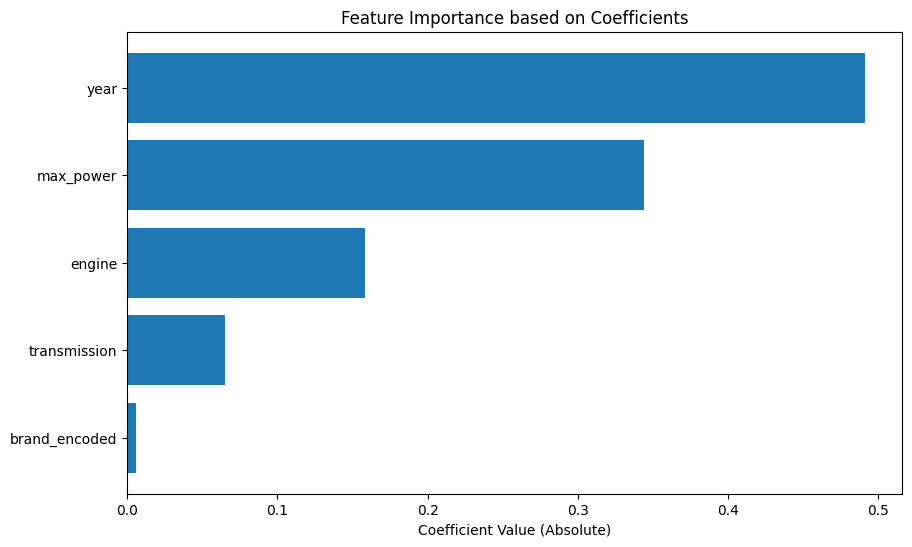

In [81]:
# Example feature names
feature_names = ['brand_encoded','engine', 'max_power','transmission','year']

# Call the plotting function with feature names
model.feature_importance_plot(feature_names=feature_names)

In [108]:
import pickle

# Use the correct model object: Replace `grid` with your actual model variable (e.g., `model`, `clf`, or `best_model`)
pickle.dump(model, open('A2_predicting_car_price.model', 'wb'))
# This syntax works, but the file closes immediately without saving properly due to the open() statement being inline.

In [109]:
import os
import pickle

# Create 'models/' directory if not exists
os.makedirs('models', exist_ok=True)

# Save the model into 'models/' directory
filename = os.path.join('models', 'A2_predicting_car_price.model')
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved at: {filename}")


Model saved at: models\A2_predicting_car_price.model


In [110]:
import pickle

# Path to the saved model
filename = 'models/A2_predicting_car_price.model'

# Load the model from disk
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

print("Model loaded successfully.")

Model loaded successfully.


In [111]:
# time to run some test prediction
# Let's get some features and lables data from some random dataset locations first
df[['brand_encoded','engine', 'max_power', 'transmission','year','selling_price']].loc[150]

brand_encoded      11.000000
engine           1797.000000
max_power         147.500000
transmission        1.000000
year             2016.000000
selling_price      13.598598
Name: 150, dtype: float64

In [112]:
#['engine', 'max_power', 'transmission','year','selling_price']
sample = np.array([[11, 1797.0, 147.50, 1.0, 2016]])
sample= scaler.transform(sample)

# Insert Bias (Intercept) Column
# Linear models usually require an intercept (bias), so add a column of ones.
# np.insert inserts a column of 1s at index 0, resulting in a 2D array:
# Shape changes from (1, 5) to (1, 6)
sample = np.insert(sample, 0, 1, axis=1) 


predicted_car_price = loaded_model.predict(sample)
predicted_car_price = np.exp(predicted_car_price) # re-convert the predicted car prices into actual values from log values by using exponential function.
print(predicted_car_price)

[1063136.10247493]


In [113]:
#Get the actual value of sample at row with index 30 
actual_value = np.exp(df.loc[150, 'selling_price'])  # Since selling_price is log-transformed
print(f"Actual value: {actual_value}")


Actual value: 804999.9999999993


In [114]:
# find the difference between predicted_car_price Vs actual_value to assess the prediction is reasonable or not. 
print(f"Predicted value: {predicted_car_price}")
print(f"Actual value: {actual_value}")

difference = abs(predicted_car_price - actual_value)
print(f"Difference: {difference}")


Predicted value: [1063136.10247493]
Actual value: 804999.9999999993
Difference: [258136.10247493]


In [115]:
df[['brand_encoded','engine', 'max_power', 'transmission','year','selling_price']].loc[250]

brand_encoded      11.000000
engine           1341.000000
max_power          82.900000
transmission        1.000000
year             2008.000000
selling_price      11.608236
Name: 250, dtype: float64

In [123]:
#brand_encoded','engine', 'max_power', 'transmission','year
sample = np.array([[11, 1341.0, 82.90, 1.0, 2008]])
sample= scaler.transform(sample)

# Insert Bias (Intercept) Column
# Linear models usually require an intercept (bias), so add a column of ones.
# np.insert inserts a column of 1s at index 0, resulting in a 2D array:
# Shape changes from (1, 5) to (1, 6)
sample = np.insert(sample, 0, 1, axis=1) 


predicted_car_price = loaded_model.predict(sample)
predicted_car_price = np.exp(predicted_car_price) # re-convert the predicted car prices into actual values from log values by using exponential function.
print(predicted_car_price)

[183877.61678985]


In [117]:
#Get the actual value of sample at row with index 30 
actual_value = np.exp(df.loc[250, 'selling_price'])  # Since selling_price is log-transformed
print(f"Actual value: {actual_value}")

Actual value: 109999.99999999991


In [118]:
# find the difference between predicted_car_price Vs actual_value to assess the prediction is reasonable or not. 
print(f"Predicted value: {predicted_car_price}")
print(f"Actual value: {actual_value}")

difference = abs(predicted_car_price - actual_value)
print(f"Difference: {difference}")

Predicted value: [183877.61678985]
Actual value: 109999.99999999991
Difference: [73877.61678985]


In [119]:
import os
print(os.getcwd())  # Show current directory


d:\ML_Assignment\A2_ Assignment


In [121]:
# Check if theta is present in the loaded model
if hasattr(loaded_model, 'theta'):
    print("Theta found in model:", loaded_model.theta)
else:
    print("Theta not found in model.")


Theta found in model: [ 1.29860154e+01 -5.52254065e-03  1.58136365e-01  3.44094641e-01
 -6.49981335e-02  4.91233061e-01]
